In [2]:
import torch

In [4]:
print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4060 Laptop GPU


In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [8]:
# Feature Importance

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Loading Data "Radiomics_data.csv" 

df = pd.read_csv("Radiomics_data.csv")

if df.isnull().sum().any():
    print("Missing values detected. Filling missing values with the mean of the columns.")
    df.fillna(df.mean(), inplace=True)

Correlation Matrix:
                                                      Gender  Age at Diag  \
Gender                                              1.000000     0.027048   
Age at Diag                                         0.027048     1.000000   
Smoking status - Current                            0.011611    -0.125332   
Smoking status - Former                            -0.040076     0.231419   
Smoking status                                      0.066149    -0.012362   
Smoking status.1                                    0.020825    -0.117922   
Smoking status (Packs-Years)                        0.014449     0.204138   
Tumor laterality - 0S                               0.017357     0.075886   
Tumor laterality - L                               -0.084359    -0.008655   
Tumor laterality - Midline                          0.017985    -0.036796   
Tumor laterality - R                                0.075360     0.004288   
Cancer subsite of origin - 0S                       0.07

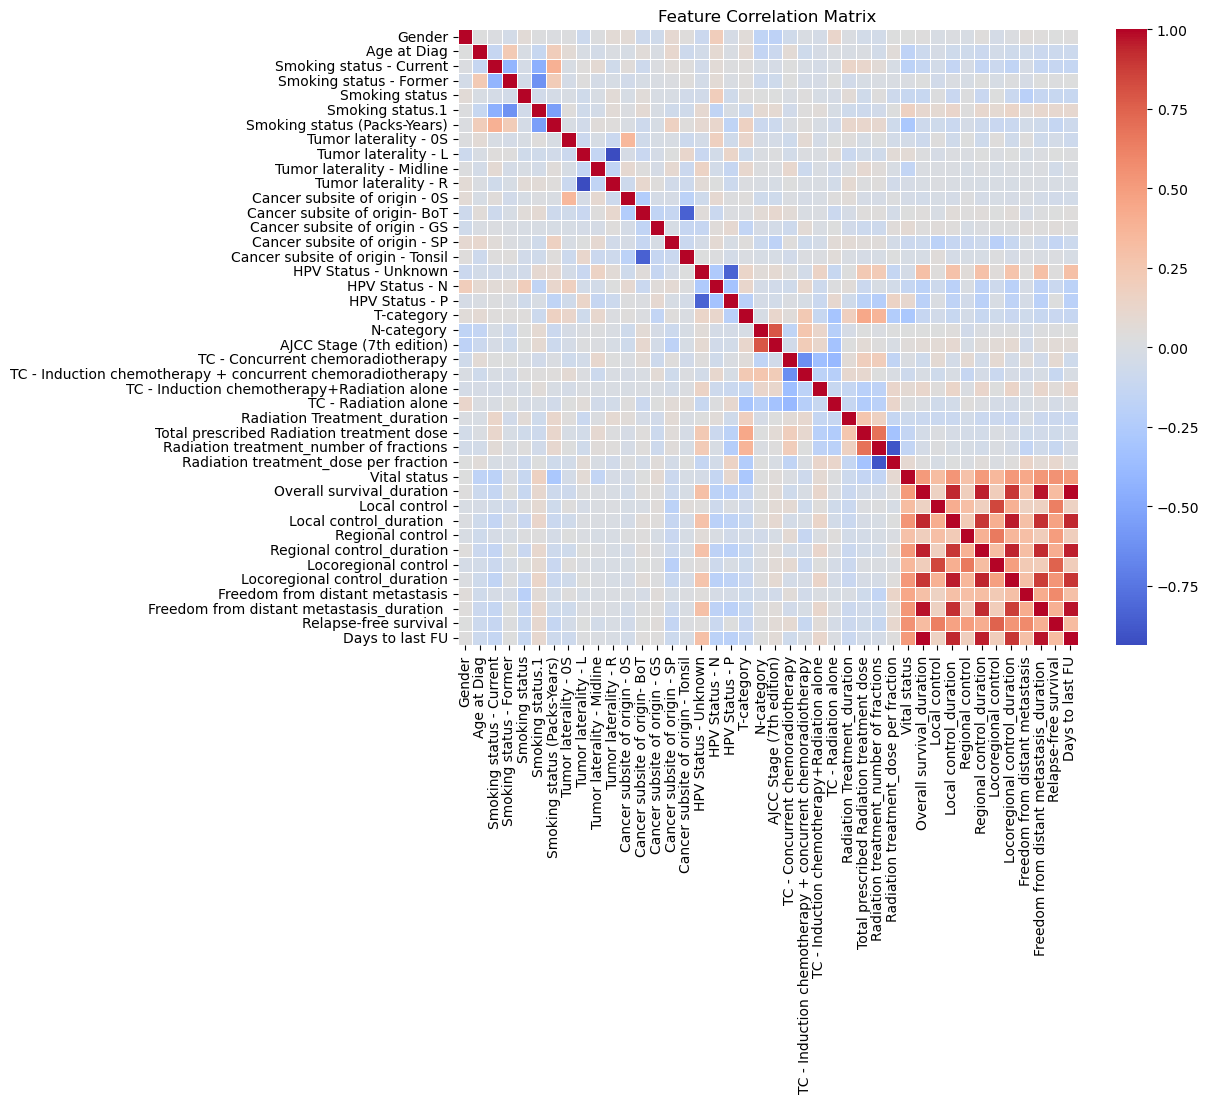

In [47]:
# Correlation Matrix for Features

correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.savefig("Feature Correlation Matrix.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Feature Correlation Matrix.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()


Running Lasso with alpha=0.01 and max_iter=5000


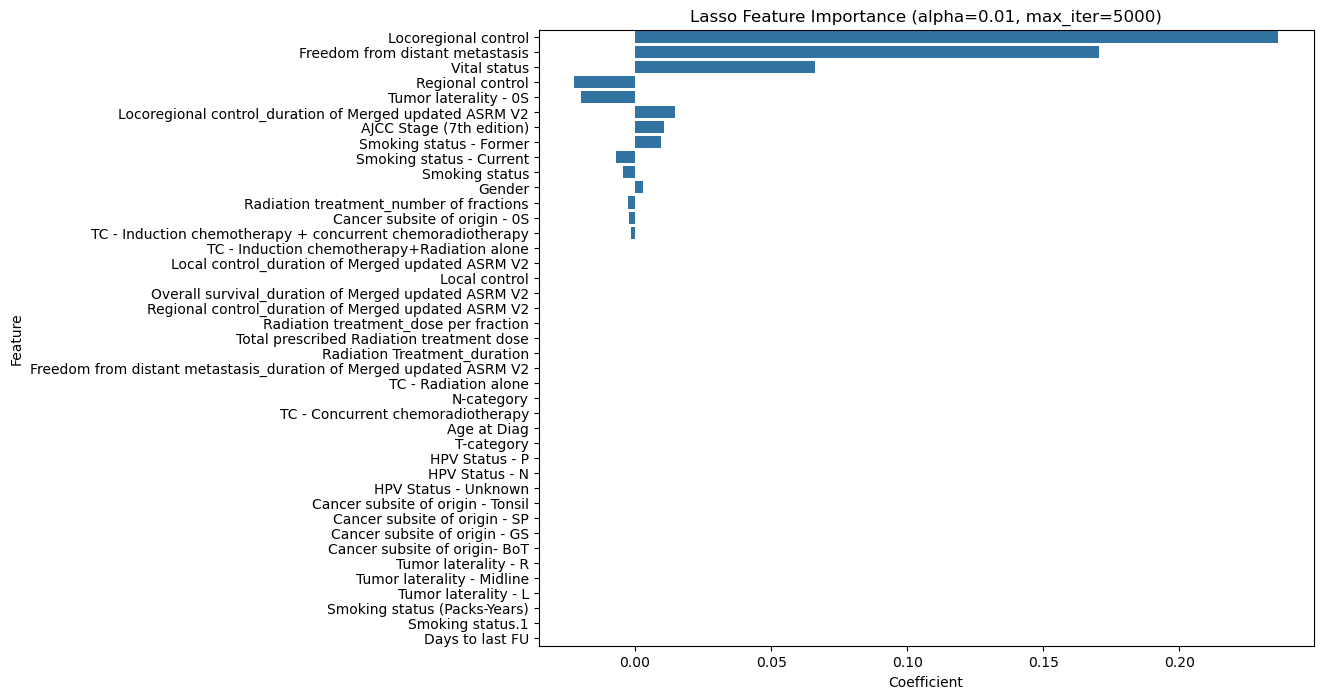


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=5000):
                                              Feature  Coefficient
36                               Locoregional control     0.236419
38                    Freedom from distant metastasis     0.170625
30                                       Vital status     0.066238
34                                   Regional control    -0.022496
7                               Tumor laterality - 0S    -0.019742
37  Locoregional control_duration of Merged update...     0.014694
21                           AJCC Stage (7th edition)     0.010707
3                             Smoking status - Former     0.009612
2                            Smoking status - Current    -0.007053
4                                      Smoking status    -0.004538
0                                              Gender     0.002764
28            Radiation treatment_number of fractions    -0.002434
11                      Cancer subsite of origin - 0S    -0

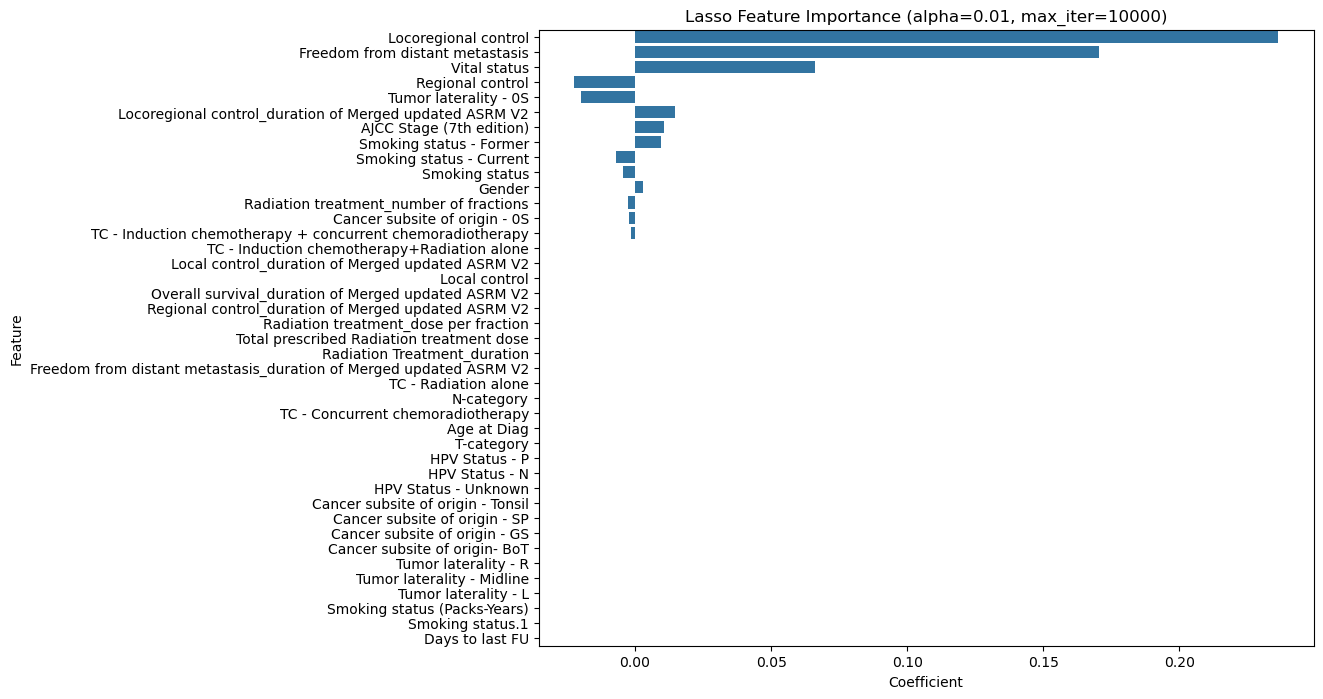


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=10000):
                                              Feature  Coefficient
36                               Locoregional control     0.236419
38                    Freedom from distant metastasis     0.170625
30                                       Vital status     0.066238
34                                   Regional control    -0.022496
7                               Tumor laterality - 0S    -0.019742
37  Locoregional control_duration of Merged update...     0.014694
21                           AJCC Stage (7th edition)     0.010707
3                             Smoking status - Former     0.009612
2                            Smoking status - Current    -0.007053
4                                      Smoking status    -0.004538
0                                              Gender     0.002764
28            Radiation treatment_number of fractions    -0.002434
11                      Cancer subsite of origin - 0S    -

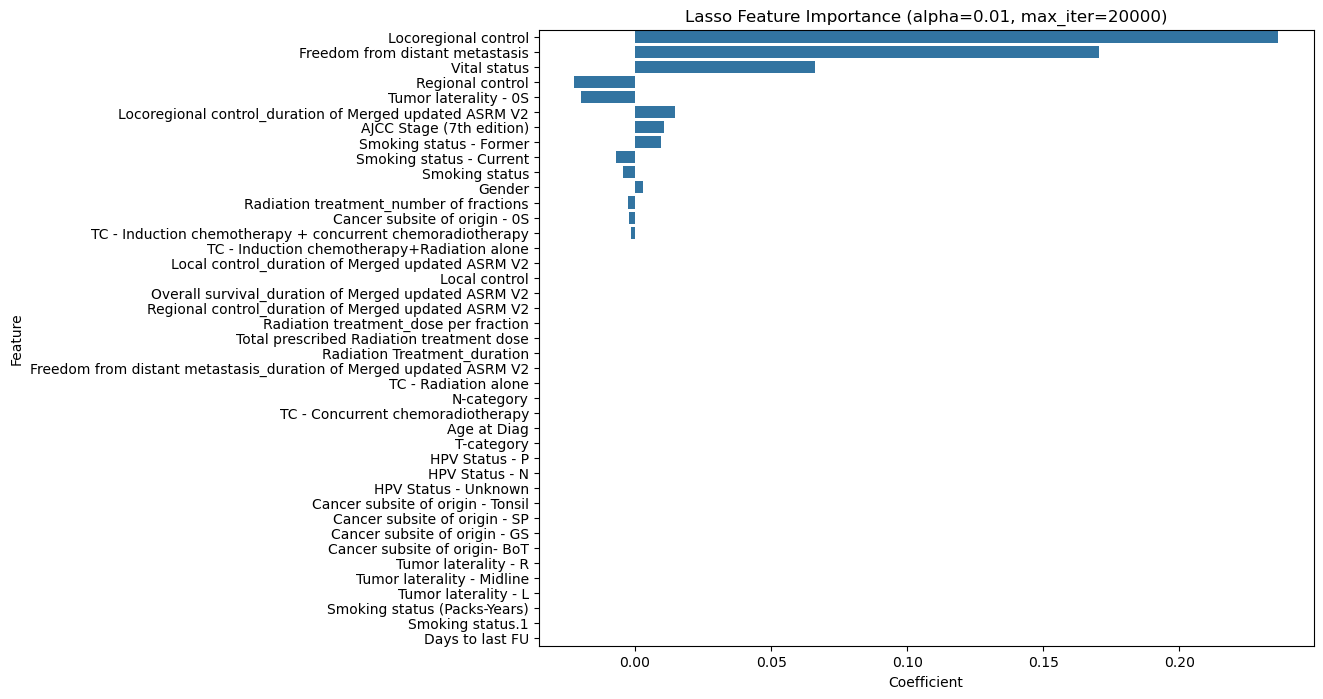


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=20000):
                                              Feature  Coefficient
36                               Locoregional control     0.236419
38                    Freedom from distant metastasis     0.170625
30                                       Vital status     0.066238
34                                   Regional control    -0.022496
7                               Tumor laterality - 0S    -0.019742
37  Locoregional control_duration of Merged update...     0.014694
21                           AJCC Stage (7th edition)     0.010707
3                             Smoking status - Former     0.009612
2                            Smoking status - Current    -0.007053
4                                      Smoking status    -0.004538
0                                              Gender     0.002764
28            Radiation treatment_number of fractions    -0.002434
11                      Cancer subsite of origin - 0S    -

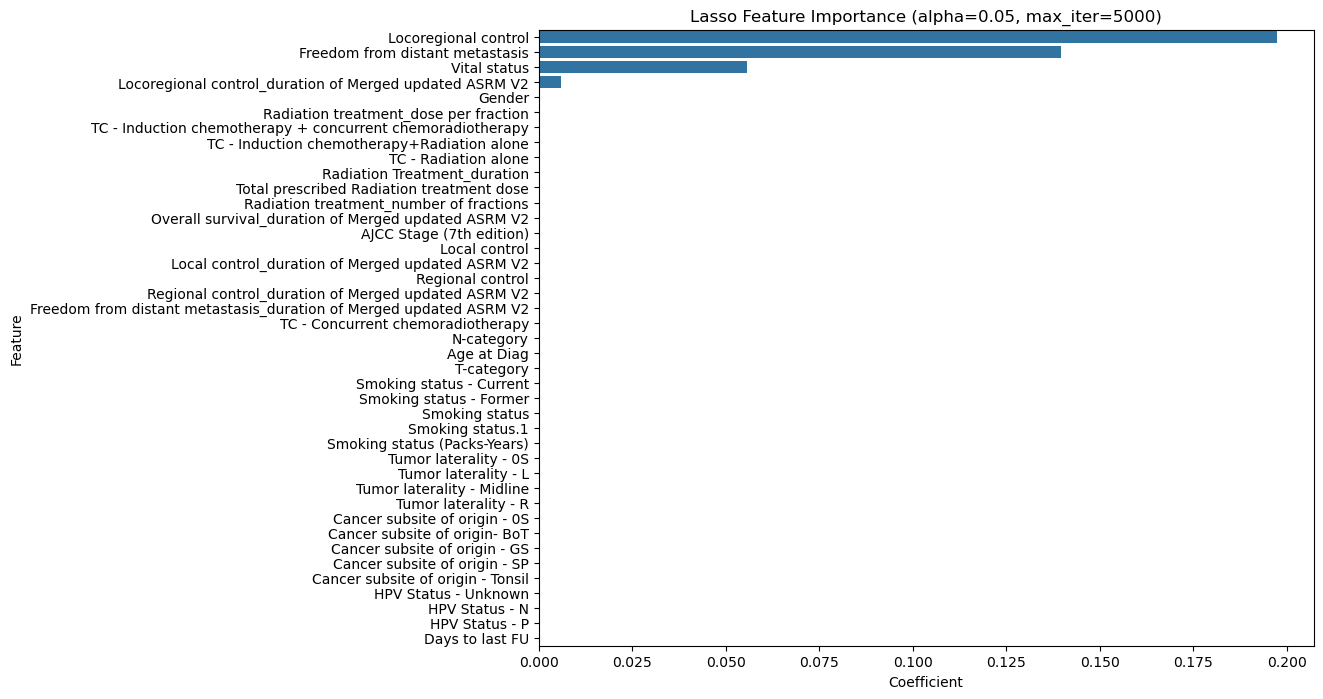


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=5000):
                                              Feature  Coefficient
36                               Locoregional control     0.197317
38                    Freedom from distant metastasis     0.139542
30                                       Vital status     0.055659
37  Locoregional control_duration of Merged update...     0.006075
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=10000


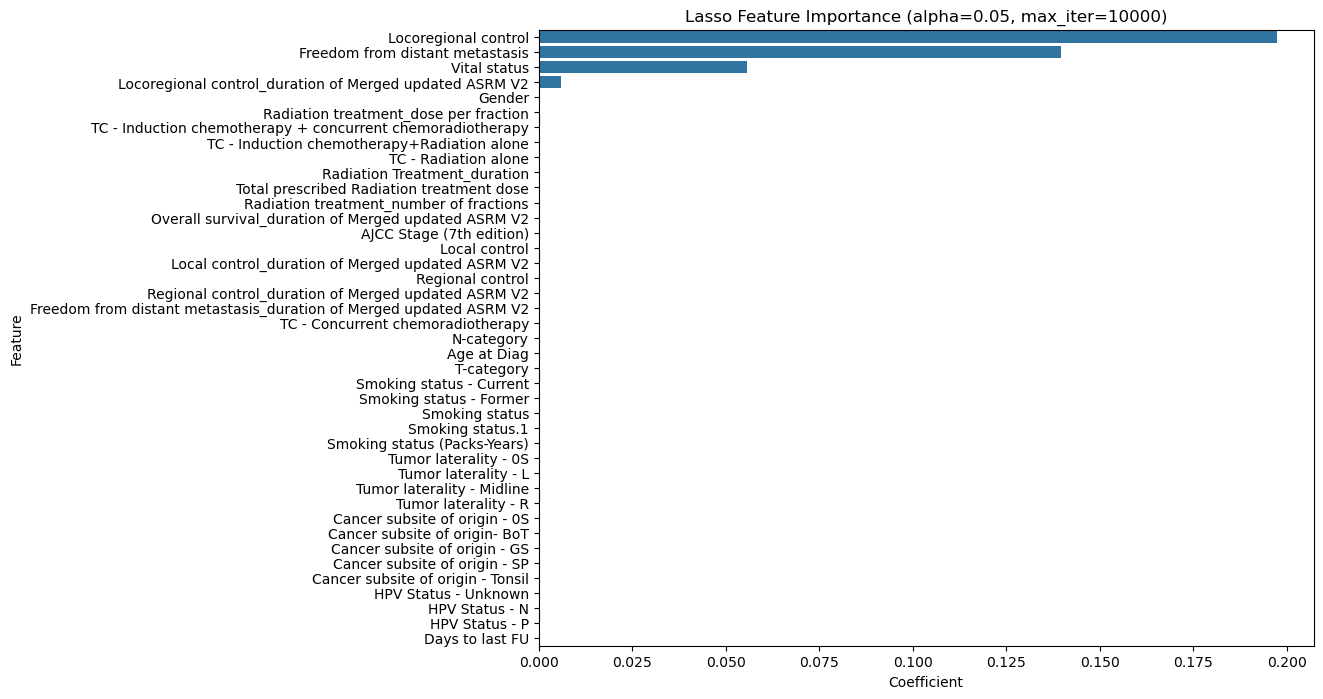


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=10000):
                                              Feature  Coefficient
36                               Locoregional control     0.197317
38                    Freedom from distant metastasis     0.139542
30                                       Vital status     0.055659
37  Locoregional control_duration of Merged update...     0.006075
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=20000


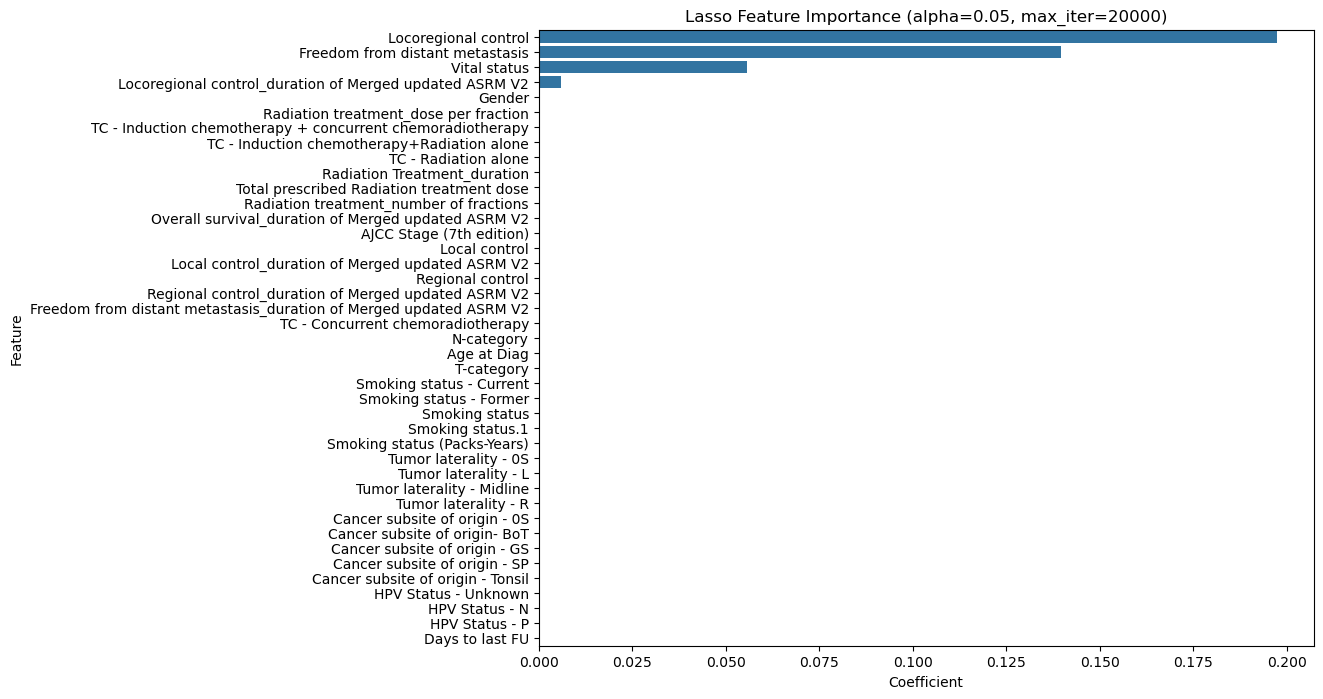


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=20000):
                                              Feature  Coefficient
36                               Locoregional control     0.197317
38                    Freedom from distant metastasis     0.139542
30                                       Vital status     0.055659
37  Locoregional control_duration of Merged update...     0.006075
----------------------------------------------------------------------------------------------------



In [76]:
# Feature importance using Lasso Regression for "Relapse-free survival"

target_column = 'Relapse-free survival'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = [0.01, 0.05] 
max_iter_values = [5000, 10000, 20000]  

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        print(f"Running Lasso with alpha={alpha} and max_iter={max_iter}")
        
        lasso = Lasso(alpha=alpha, max_iter=max_iter)
        lasso.fit(X_train_scaled, y_train)

        coefficients = lasso.coef_

        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefficients
        })

        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

        results.append((alpha, max_iter, feature_importance))

        # print(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter}):")
        # print(feature_importance[['Feature', 'Coefficient']])

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter})")
        plt.show()

        non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

        print(f"\nSummary of Non-Zero Feature Importances (alpha={alpha}, max_iter={max_iter}):")
        print(non_zero_features[['Feature', 'Coefficient']])
        print('--' * 50)
        print()

Running Lasso with alpha=0.01 and max_iter=5000


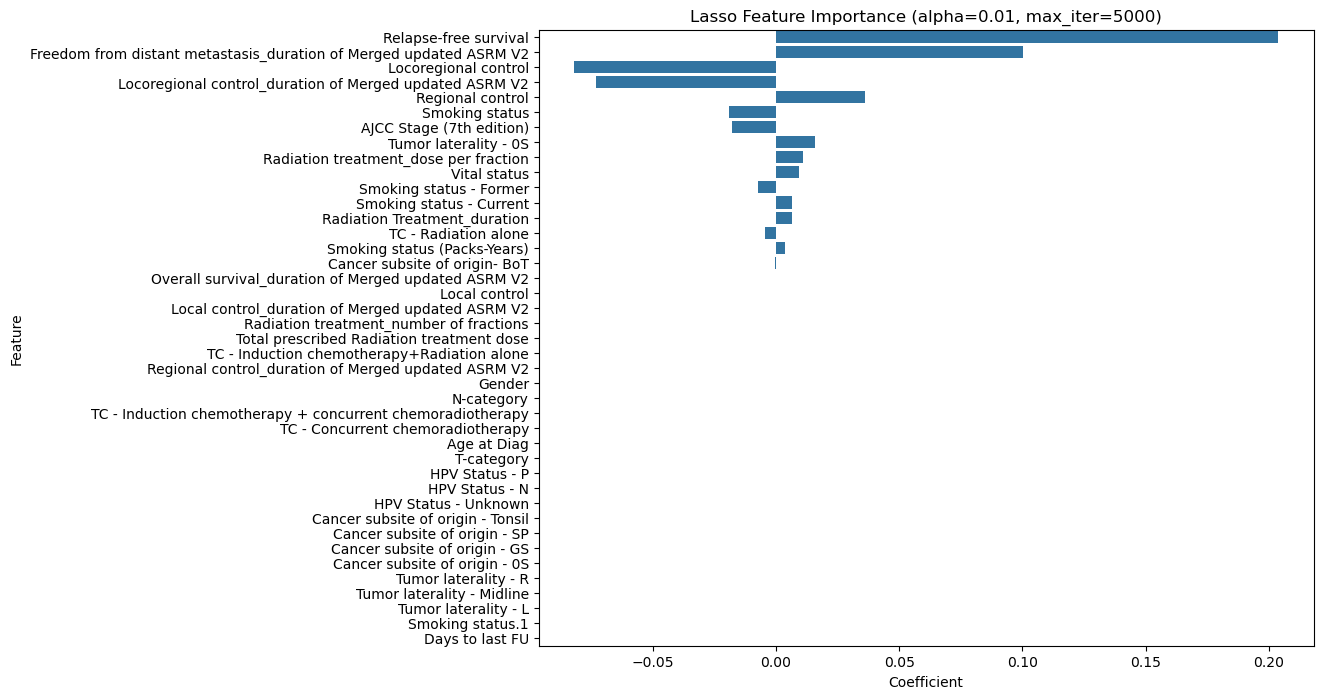


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=5000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.203869
38  Freedom from distant metastasis_duration of Me...     0.100434
36                               Locoregional control    -0.081958
37  Locoregional control_duration of Merged update...    -0.072852
34                                   Regional control     0.036181
4                                      Smoking status    -0.019146
21                           AJCC Stage (7th edition)    -0.017862
7                               Tumor laterality - 0S     0.015736
29              Radiation treatment_dose per fraction     0.011062
30                                       Vital status     0.009316
3                             Smoking status - Former    -0.007068
2                            Smoking status - Current     0.006409
26                       Radiation Treatment_duration     0

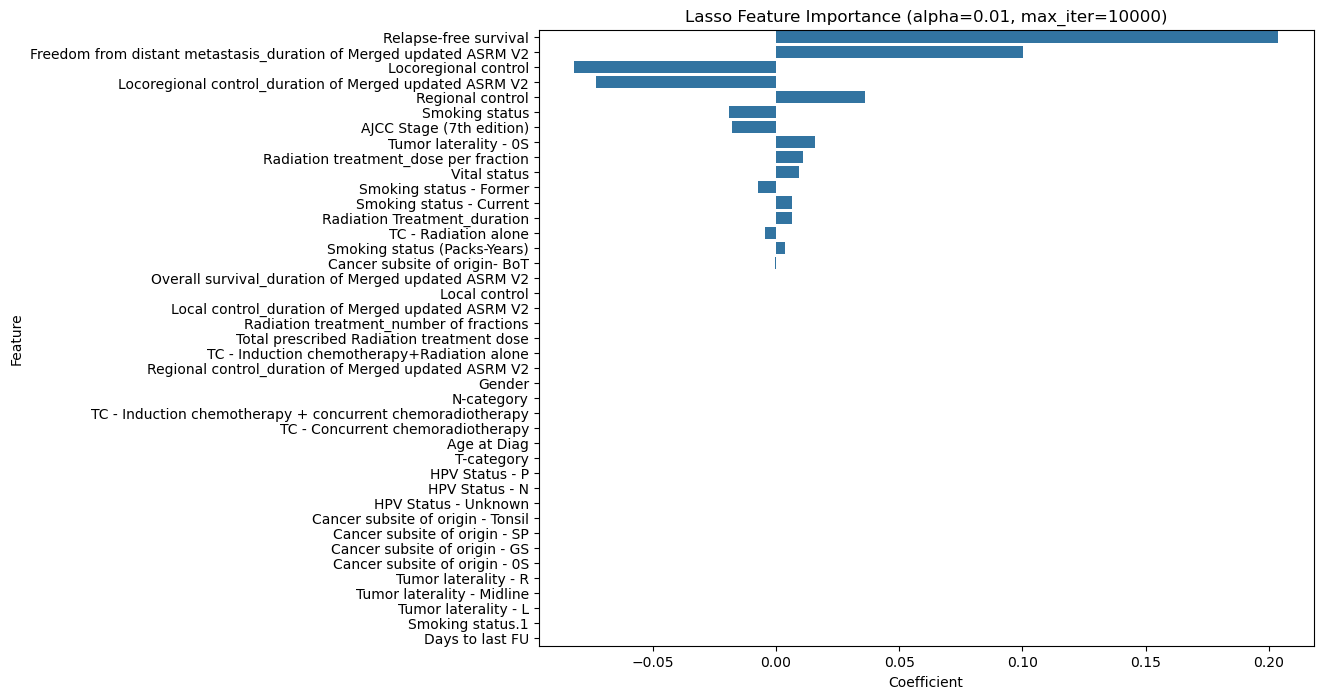


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=10000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.203869
38  Freedom from distant metastasis_duration of Me...     0.100434
36                               Locoregional control    -0.081958
37  Locoregional control_duration of Merged update...    -0.072852
34                                   Regional control     0.036181
4                                      Smoking status    -0.019146
21                           AJCC Stage (7th edition)    -0.017862
7                               Tumor laterality - 0S     0.015736
29              Radiation treatment_dose per fraction     0.011062
30                                       Vital status     0.009316
3                             Smoking status - Former    -0.007068
2                            Smoking status - Current     0.006409
26                       Radiation Treatment_duration     

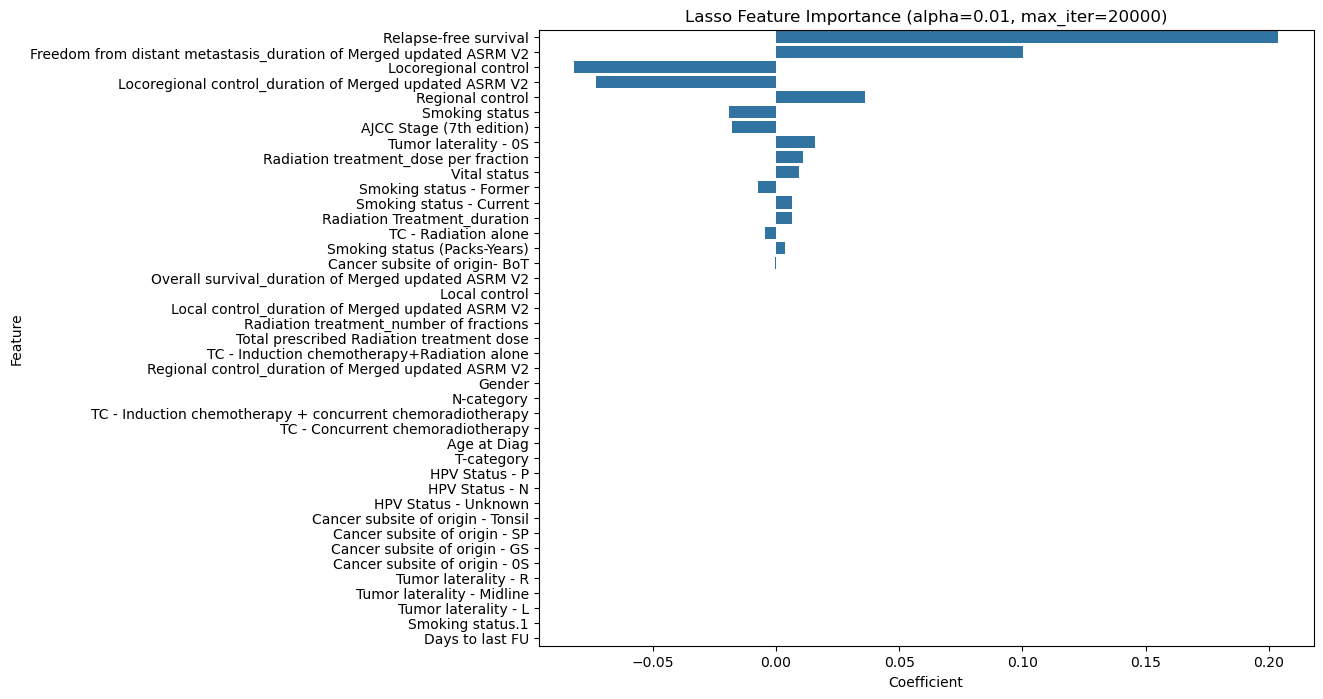


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=20000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.203869
38  Freedom from distant metastasis_duration of Me...     0.100434
36                               Locoregional control    -0.081958
37  Locoregional control_duration of Merged update...    -0.072852
34                                   Regional control     0.036181
4                                      Smoking status    -0.019146
21                           AJCC Stage (7th edition)    -0.017862
7                               Tumor laterality - 0S     0.015736
29              Radiation treatment_dose per fraction     0.011062
30                                       Vital status     0.009316
3                             Smoking status - Former    -0.007068
2                            Smoking status - Current     0.006409
26                       Radiation Treatment_duration     

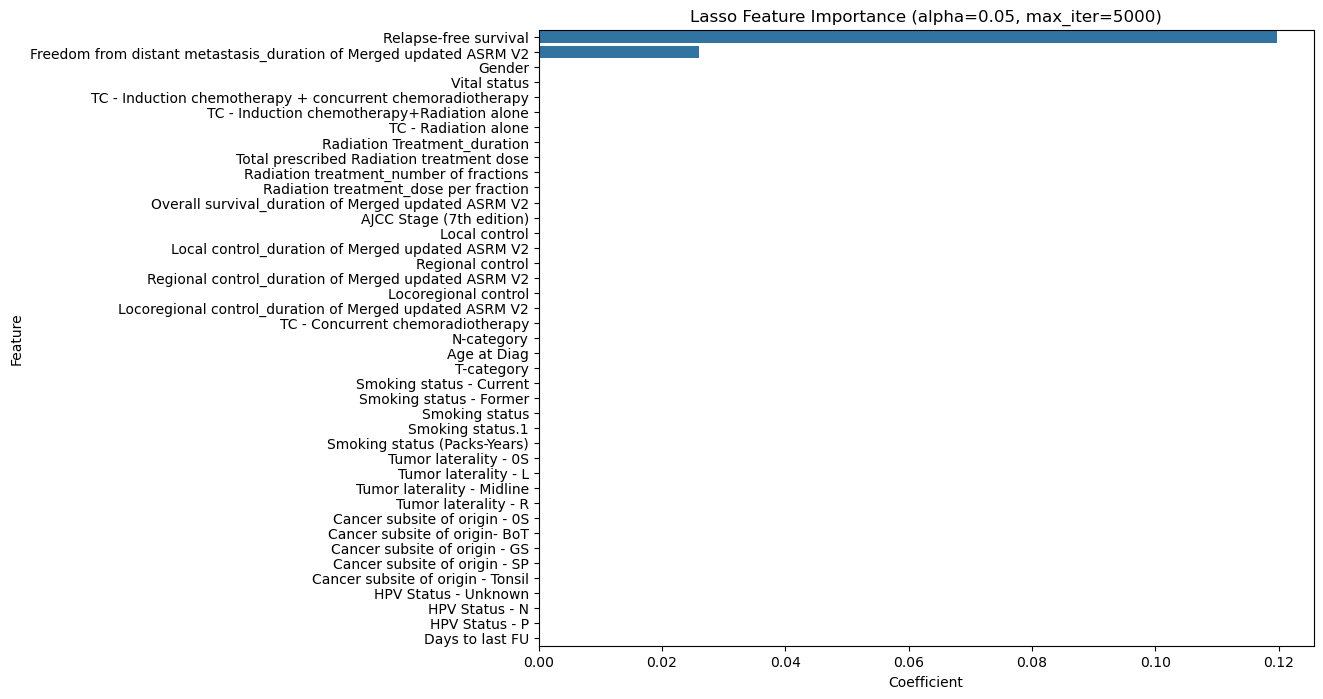


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=5000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.119706
38  Freedom from distant metastasis_duration of Me...     0.026039
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=10000


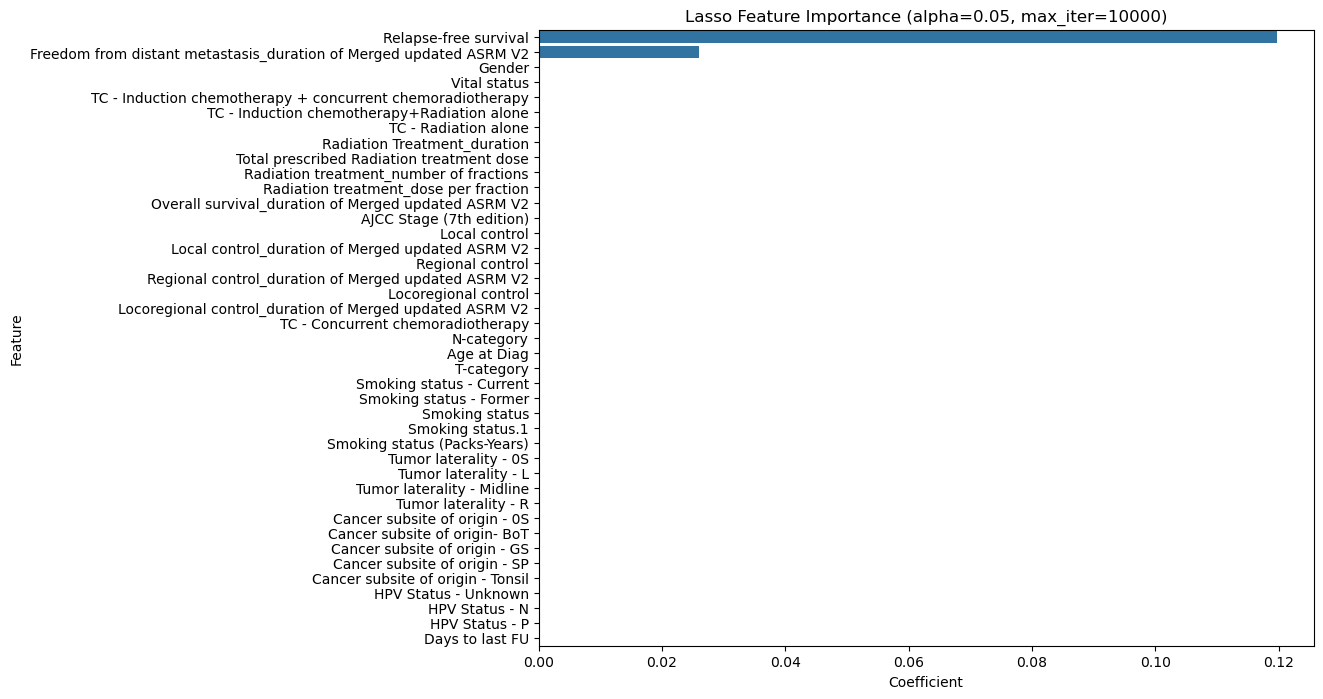


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=10000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.119706
38  Freedom from distant metastasis_duration of Me...     0.026039
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=20000


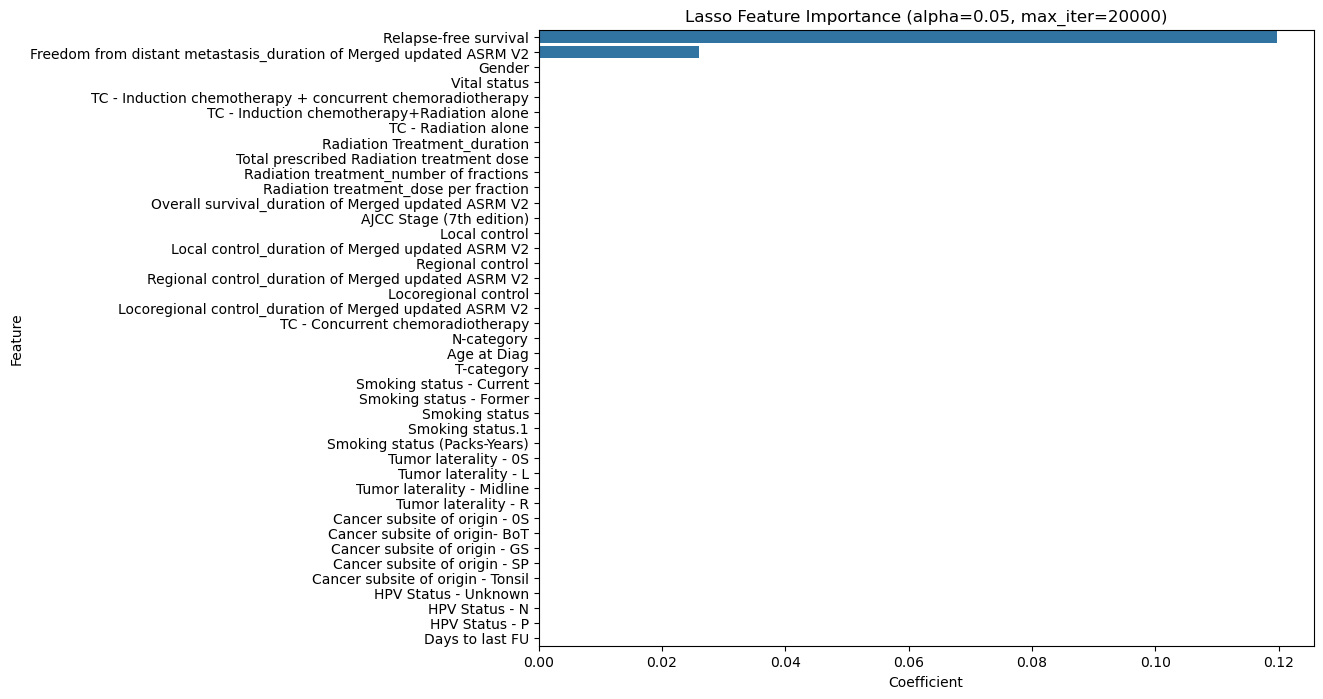


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=20000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.119706
38  Freedom from distant metastasis_duration of Me...     0.026039
----------------------------------------------------------------------------------------------------



In [79]:
# Feature importance using Lasso Regression for "Freedom from distant metastasis"

target_column = 'Freedom from distant metastasis'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = [0.01, 0.05] 
max_iter_values = [5000, 10000, 20000]  

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        print(f"Running Lasso with alpha={alpha} and max_iter={max_iter}")
        
        lasso = Lasso(alpha=alpha, max_iter=max_iter)
        lasso.fit(X_train_scaled, y_train)

        coefficients = lasso.coef_

        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefficients
        })

        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

        results.append((alpha, max_iter, feature_importance))

        # print(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter}):")
        # print(feature_importance[['Feature', 'Coefficient']])

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter})")
        plt.show()

        non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

        print(f"\nSummary of Non-Zero Feature Importances (alpha={alpha}, max_iter={max_iter}):")
        print(non_zero_features[['Feature', 'Coefficient']])
        print('--' * 50)
        print()

Running Lasso with alpha=0.01 and max_iter=5000


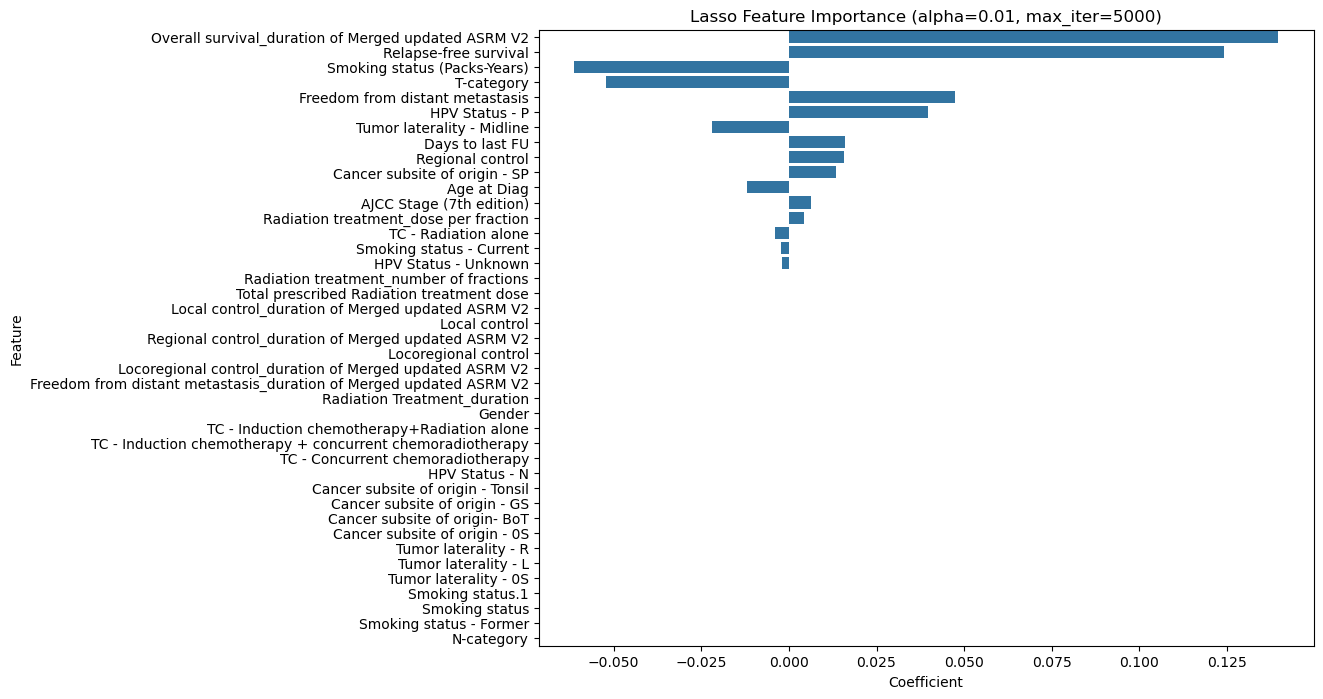


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=5000):
                                              Feature  Coefficient
30  Overall survival_duration of Merged updated AS...     0.139636
39                              Relapse-free survival     0.123976
6                        Smoking status (Packs-Years)    -0.061339
19                                         T-category    -0.052053
37                    Freedom from distant metastasis     0.047316
18                                     HPV Status - P     0.039613
9                          Tumor laterality - Midline    -0.021806
40                                    Days to last FU     0.016121
33                                   Regional control     0.015603
14                      Cancer subsite of origin - SP     0.013477
1                                         Age at Diag    -0.012068
21                           AJCC Stage (7th edition)     0.006315
29              Radiation treatment_dose per fraction     0

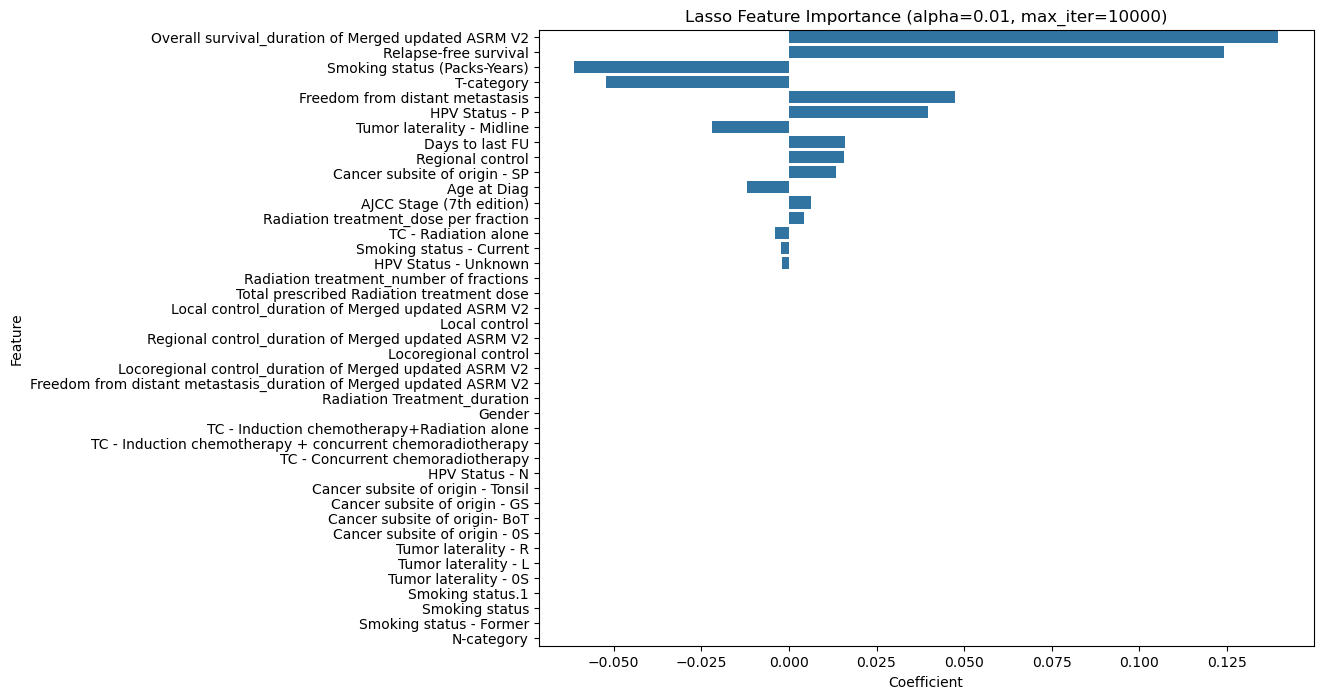


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=10000):
                                              Feature  Coefficient
30  Overall survival_duration of Merged updated AS...     0.139636
39                              Relapse-free survival     0.123976
6                        Smoking status (Packs-Years)    -0.061339
19                                         T-category    -0.052053
37                    Freedom from distant metastasis     0.047316
18                                     HPV Status - P     0.039613
9                          Tumor laterality - Midline    -0.021806
40                                    Days to last FU     0.016121
33                                   Regional control     0.015603
14                      Cancer subsite of origin - SP     0.013477
1                                         Age at Diag    -0.012068
21                           AJCC Stage (7th edition)     0.006315
29              Radiation treatment_dose per fraction     

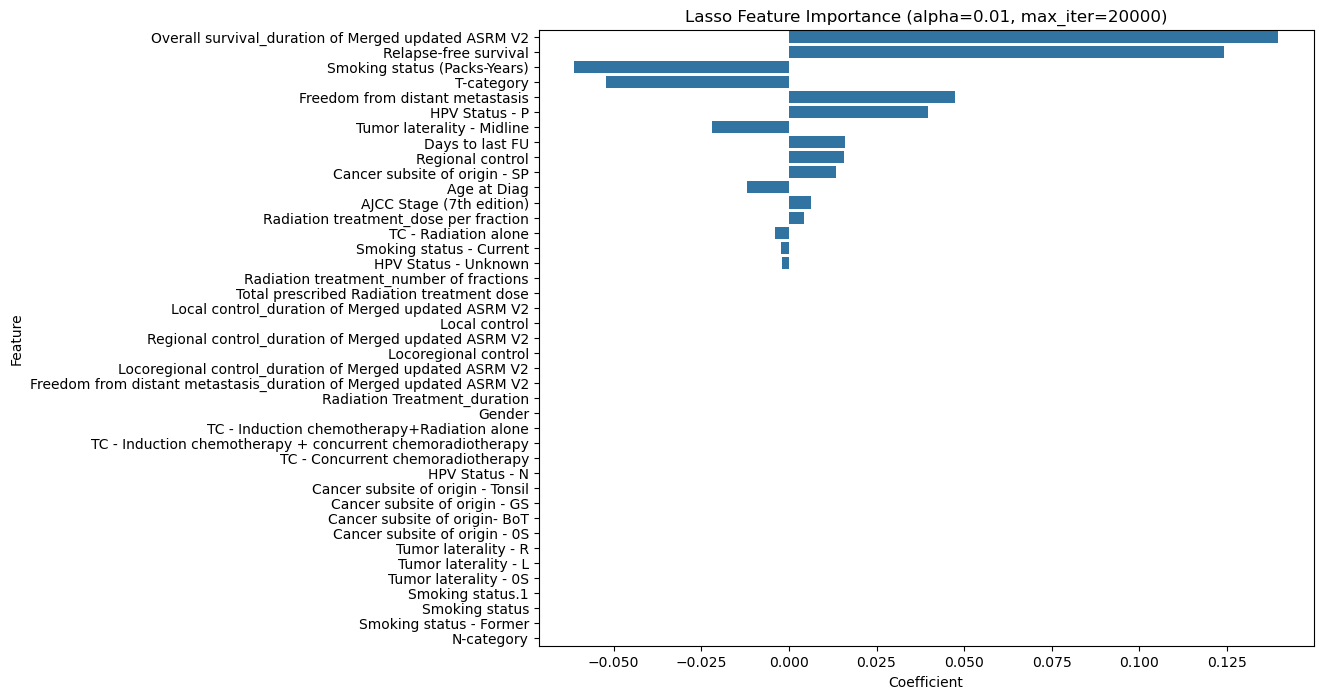


Summary of Non-Zero Feature Importances (alpha=0.01, max_iter=20000):
                                              Feature  Coefficient
30  Overall survival_duration of Merged updated AS...     0.139636
39                              Relapse-free survival     0.123976
6                        Smoking status (Packs-Years)    -0.061339
19                                         T-category    -0.052053
37                    Freedom from distant metastasis     0.047316
18                                     HPV Status - P     0.039613
9                          Tumor laterality - Midline    -0.021806
40                                    Days to last FU     0.016121
33                                   Regional control     0.015603
14                      Cancer subsite of origin - SP     0.013477
1                                         Age at Diag    -0.012068
21                           AJCC Stage (7th edition)     0.006315
29              Radiation treatment_dose per fraction     

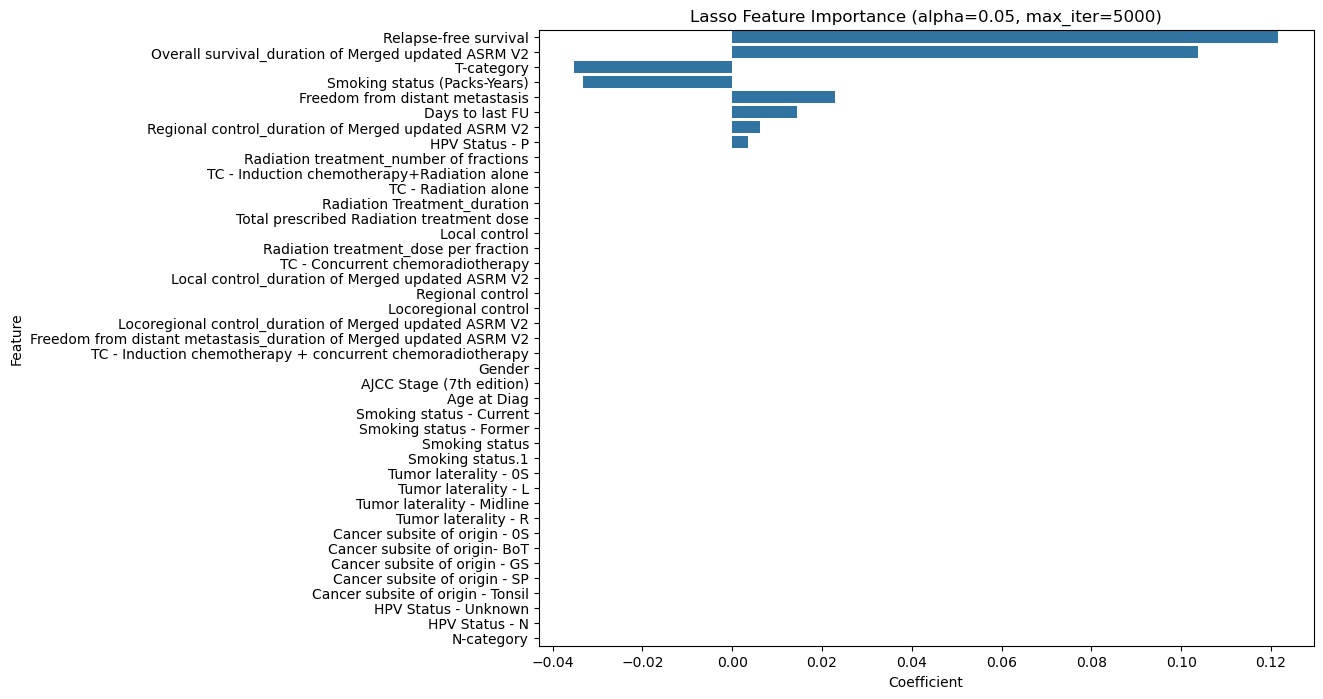


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=5000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.121637
30  Overall survival_duration of Merged updated AS...     0.103836
19                                         T-category    -0.035274
6                        Smoking status (Packs-Years)    -0.033137
37                    Freedom from distant metastasis     0.022976
40                                    Days to last FU     0.014348
34  Regional control_duration of Merged updated AS...     0.006288
18                                     HPV Status - P     0.003498
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=10000


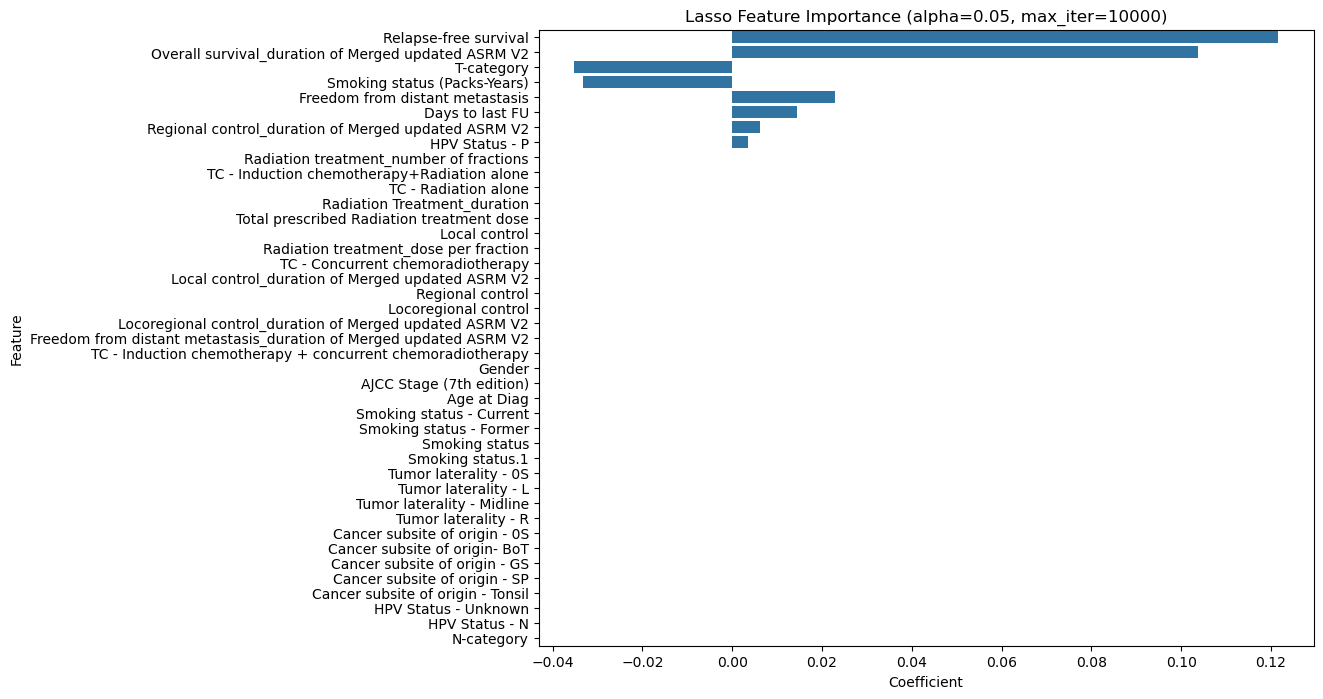


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=10000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.121637
30  Overall survival_duration of Merged updated AS...     0.103836
19                                         T-category    -0.035274
6                        Smoking status (Packs-Years)    -0.033137
37                    Freedom from distant metastasis     0.022976
40                                    Days to last FU     0.014348
34  Regional control_duration of Merged updated AS...     0.006288
18                                     HPV Status - P     0.003498
----------------------------------------------------------------------------------------------------

Running Lasso with alpha=0.05 and max_iter=20000


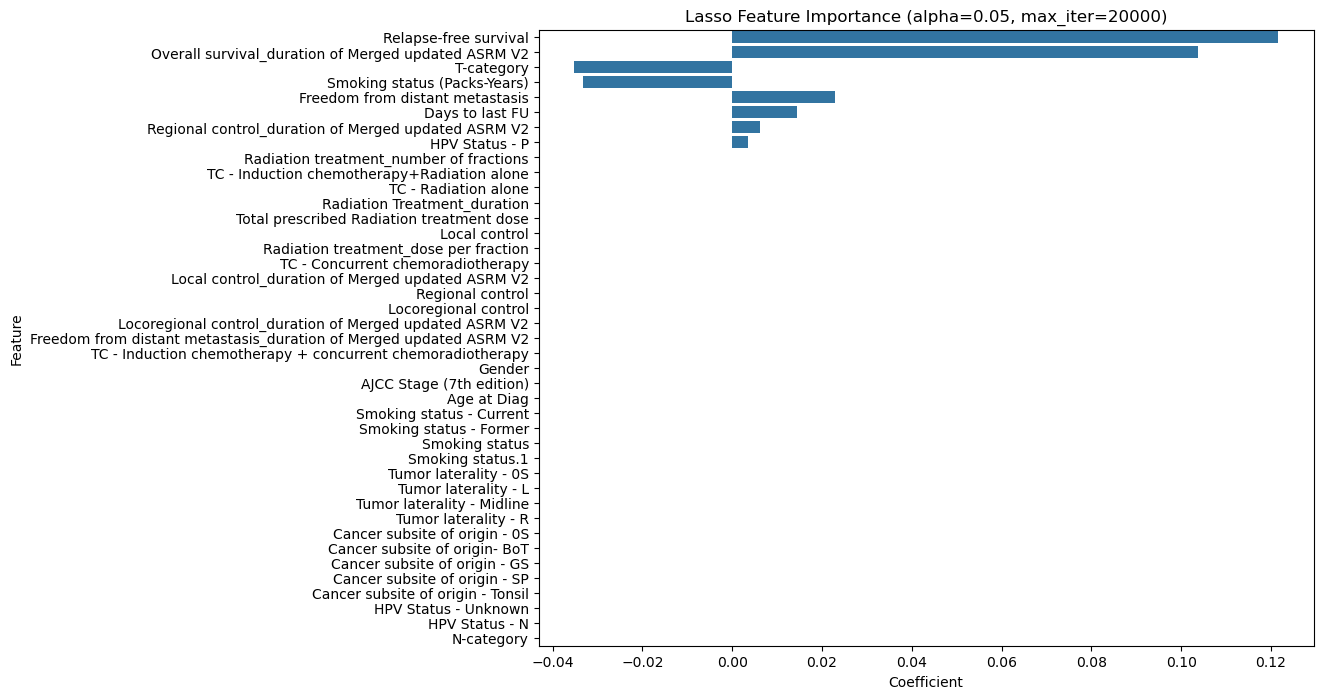


Summary of Non-Zero Feature Importances (alpha=0.05, max_iter=20000):
                                              Feature  Coefficient
39                              Relapse-free survival     0.121637
30  Overall survival_duration of Merged updated AS...     0.103836
19                                         T-category    -0.035274
6                        Smoking status (Packs-Years)    -0.033137
37                    Freedom from distant metastasis     0.022976
40                                    Days to last FU     0.014348
34  Regional control_duration of Merged updated AS...     0.006288
18                                     HPV Status - P     0.003498
----------------------------------------------------------------------------------------------------



In [81]:
# Feature importance using Lasso Regression for "Vital status"

target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alpha_values = [0.01, 0.05] 
max_iter_values = [5000, 10000, 20000]  

results = []

for alpha in alpha_values:
    for max_iter in max_iter_values:
        print(f"Running Lasso with alpha={alpha} and max_iter={max_iter}")
        
        lasso = Lasso(alpha=alpha, max_iter=max_iter)
        lasso.fit(X_train_scaled, y_train)

        coefficients = lasso.coef_

        feature_importance = pd.DataFrame({
            'Feature': X.columns,
            'Coefficient': coefficients
        })

        feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

        results.append((alpha, max_iter, feature_importance))

        # print(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter}):")
        # print(feature_importance[['Feature', 'Coefficient']])

        plt.figure(figsize=(10, 8))
        sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
        plt.title(f"Lasso Feature Importance (alpha={alpha}, max_iter={max_iter})")
        plt.show()

        non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

        print(f"\nSummary of Non-Zero Feature Importances (alpha={alpha}, max_iter={max_iter}):")
        print(non_zero_features[['Feature', 'Coefficient']])
        print('--' * 50)
        print()

Training Accuracy of XGBoost Model: 1.0000
Test Accuracy of XGBoost Model: 0.9697
Train AUC: 1.0000
Test AUC: 0.9988

XGBoost Feature Importance:
                                              Feature  Importance
36                               Locoregional control    0.387115
38                    Freedom from distant metastasis    0.285776
30                                       Vital status    0.063792
18                                     HPV Status - P    0.023965
3                             Smoking status - Former    0.020846
2                            Smoking status - Current    0.018215
16                               HPV Status - Unknown    0.015347
28            Radiation treatment_number of fractions    0.014661
35  Regional control_duration of Merged updated AS...    0.014355
31  Overall survival_duration of Merged updated AS...    0.013988
15                  Cancer subsite of origin - Tonsil    0.013677
37  Locoregional control_duration of Merged update...    0.013

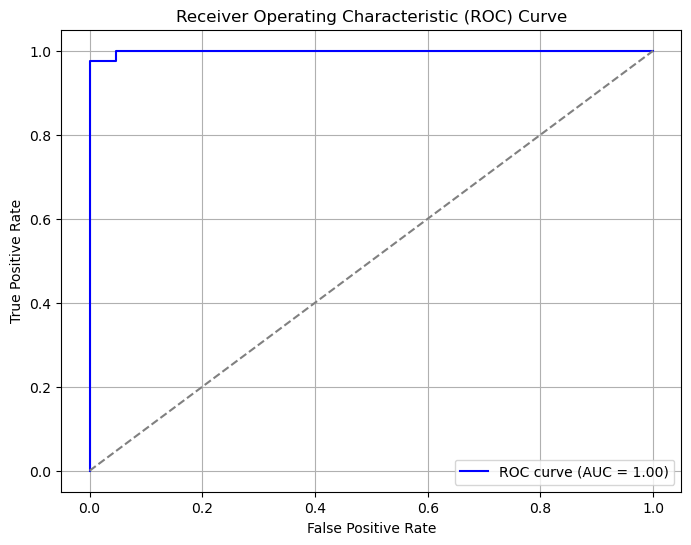

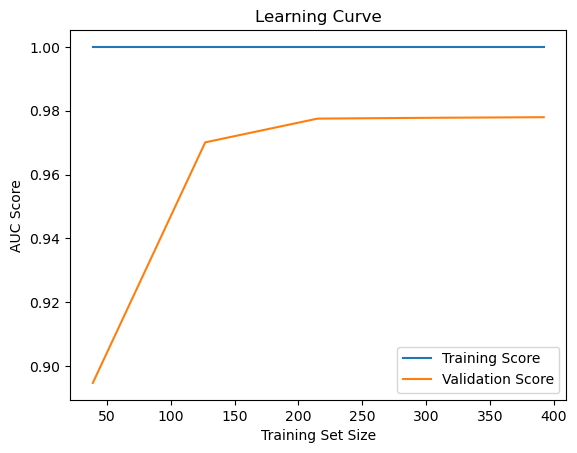

In [135]:
# Feature importance using XGBoost for "Relapse-free survival"

target_column = 'Relapse-free survival'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of XGBoost Model: {train_accuracy:.4f}")
print(f"Test Accuracy of XGBoost Model: {test_accuracy:.4f}")

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Relapse-free survival.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Relapse-free survival.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Relapse-free survival.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Relapse-free survival.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

Training Accuracy of XGBoost Model: 1.0000
Test Accuracy of XGBoost Model: 0.9596
Train AUC: 1.0000
Test AUC: 0.9946

XGBoost Feature Importance:
                                              Feature  Importance
39                              Relapse-free survival    0.444839
38  Freedom from distant metastasis_duration of Me...    0.038920
6                        Smoking status (Packs-Years)    0.034877
21                           AJCC Stage (7th edition)    0.033518
36                               Locoregional control    0.033261
31  Overall survival_duration of Merged updated AS...    0.031928
12                      Cancer subsite of origin- BoT    0.029894
37  Locoregional control_duration of Merged update...    0.028450
33   Local control_duration of Merged updated ASRM V2    0.028285
29              Radiation treatment_dose per fraction    0.027337
2                            Smoking status - Current    0.026804
5                                    Smoking status.1    0.025

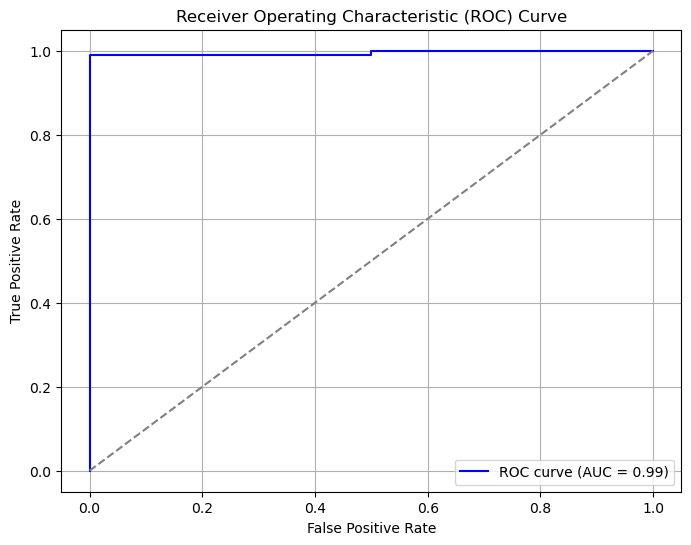

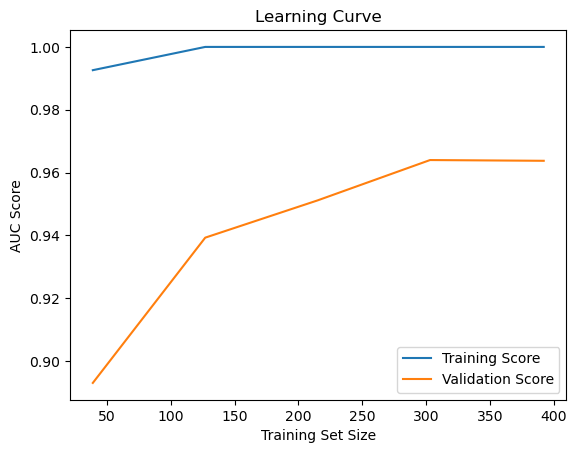

In [137]:
# Feature importance using XGBoost for "Freedom from distant metastasis"

target_column = 'Freedom from distant metastasis'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of XGBoost Model: {train_accuracy:.4f}")
print(f"Test Accuracy of XGBoost Model: {test_accuracy:.4f}")

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Freedom from distant metastasis.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Freedom from distant metastasis.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Freedom from distant metastasis.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Freedom from distant metastasis.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

Training Accuracy of XGBoost Model: 1.0000
Test Accuracy of XGBoost Model: 0.8990
Train AUC: 1.0000
Test AUC: 0.8808

XGBoost Feature Importance:
                                              Feature  Importance
32   Local control_duration of Merged updated ASRM V2    0.170382
36  Locoregional control_duration of Merged update...    0.152572
39                              Relapse-free survival    0.109825
19                                         T-category    0.049984
34  Regional control_duration of Merged updated AS...    0.036798
6                        Smoking status (Packs-Years)    0.034544
20                                         N-category    0.033868
30  Overall survival_duration of Merged updated AS...    0.032121
38  Freedom from distant metastasis_duration of Me...    0.031051
26                       Radiation Treatment_duration    0.027469
10                               Tumor laterality - R    0.025523
8                                Tumor laterality - L    0.025

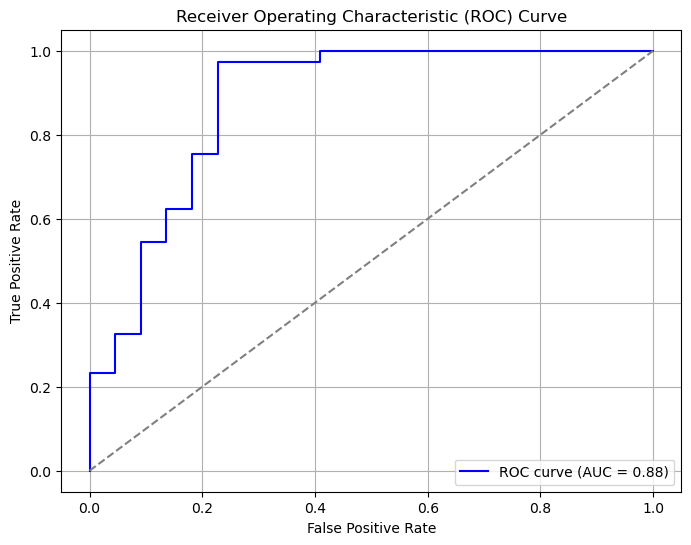

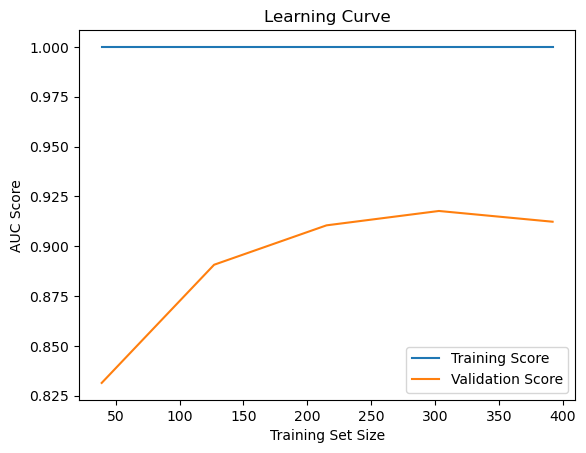

In [139]:
# Feature importance using XGBoost for "Vital status"

target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of XGBoost Model: {train_accuracy:.4f}")
print(f"Test Accuracy of XGBoost Model: {test_accuracy:.4f}")

train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(feature_importance)

y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Vital status.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Vital status.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy of Logistic Regression Model: 0.9031
Test Accuracy of Logistic Regression Model: 0.8889
Train AUC: 0.9282
Test AUC: 0.8607

Logistic Regression Feature Importance:
                                              Feature  Coefficient
39                              Relapse-free survival     0.746131
37                    Freedom from distant metastasis     0.436579
18                                     HPV Status - P     0.368662
20                                         N-category     0.275901
35                               Locoregional control     0.166903
24        TC - Induction chemotherapy+Radiation alone     0.145497
8                                Tumor laterality - L     0.142082
3                             Smoking status - Former     0.134147
21                           AJCC Stage (7th edition)     0.124267
14                      Cancer subsite of origin - SP     0.096513
0                                              Gender     0.091036
33            

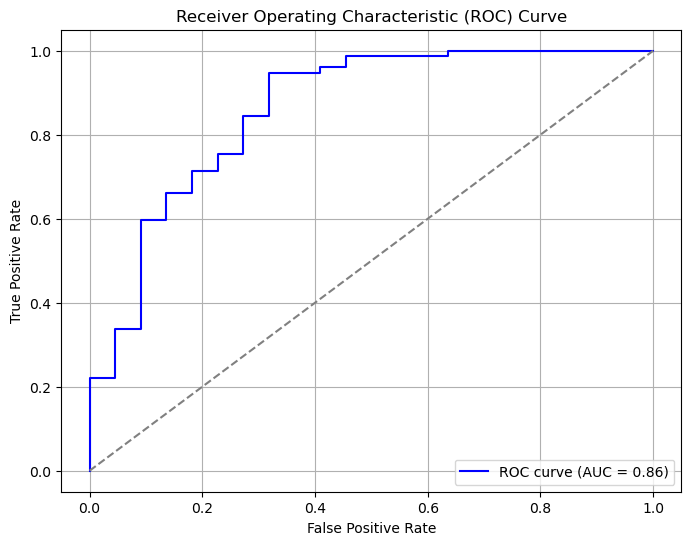

C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

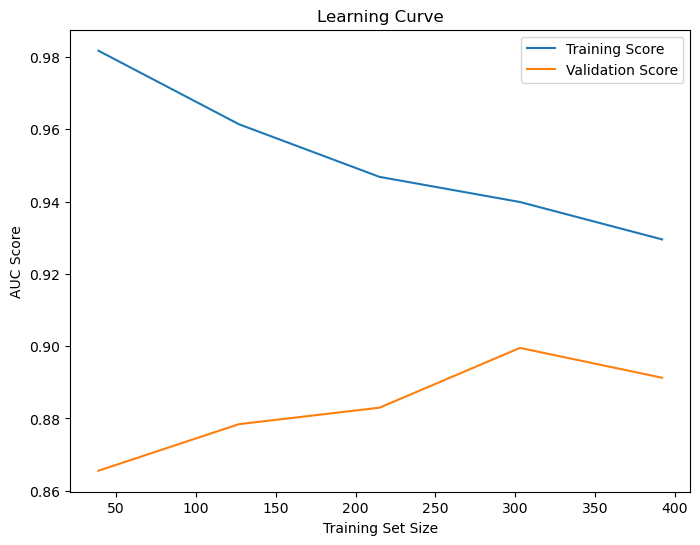

In [33]:
# BASE MODEL A - LOGISTIC REGRESSION

target_column = 'Vital status'

# Splitting data
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Logistic Regression Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Logistic Regression Model: {test_accuracy:.4f}")

# AUC Scores
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature Importance (Coefficients)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Feature Importance:")
print(feature_importance)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Logistic Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Logistic Vital status.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Logistic Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Logistic Vital status.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

Training Accuracy of Random Forest Model: 1.0000
Test Accuracy of Random Forest Model: 0.8889
Train AUC: 1.0000
Test AUC: 0.8740

Random Forest Feature Importance:
                                              Feature  Importance
32   Local control_duration of Merged updated ASRM V2    0.109673
38  Freedom from distant metastasis_duration of Me...    0.096090
34  Regional control_duration of Merged updated AS...    0.094224
40                                    Days to last FU    0.084238
36  Locoregional control_duration of Merged update...    0.080000
30  Overall survival_duration of Merged updated AS...    0.078439
39                              Relapse-free survival    0.073977
6                        Smoking status (Packs-Years)    0.053320
1                                         Age at Diag    0.040797
26                       Radiation Treatment_duration    0.039149
37                    Freedom from distant metastasis    0.027299
19                                         T

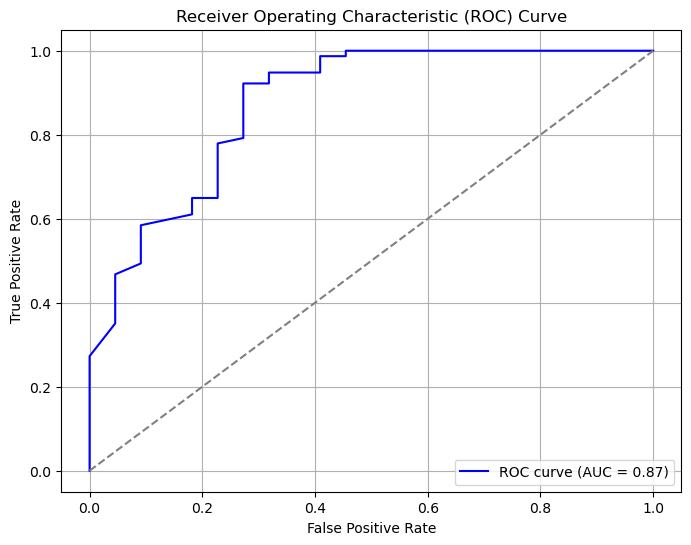

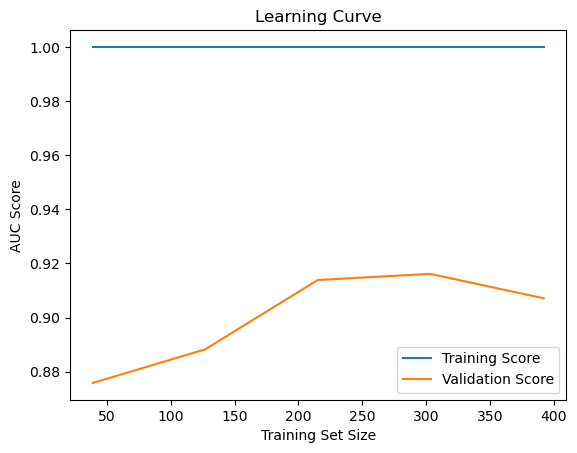

In [35]:
# BASE MODEL B - RANDOM FOREST for 'Vital_status'

target_column = 'Vital status'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Random Forest Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Random Forest Model: {test_accuracy:.4f}")

# AUC Scores
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature Importance
importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Vital status RF.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Vital status RF.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Vital status RF.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Vital status RF.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

Training Accuracy of Random Forest Model: 1.0000
Test Accuracy of Random Forest Model: 0.9495
Train AUC: 1.0000
Test AUC: 0.9758

Random Forest Feature Importance:
                                              Feature  Importance
38  Freedom from distant metastasis_duration of Me...    0.162619
39                              Relapse-free survival    0.144581
33   Local control_duration of Merged updated ASRM V2    0.070858
35  Regional control_duration of Merged updated AS...    0.068683
37  Locoregional control_duration of Merged update...    0.064286
40                                    Days to last FU    0.058127
31  Overall survival_duration of Merged updated AS...    0.049799
30                                       Vital status    0.046330
6                        Smoking status (Packs-Years)    0.029143
1                                         Age at Diag    0.027650
26                       Radiation Treatment_duration    0.026606
29              Radiation treatment_dose per

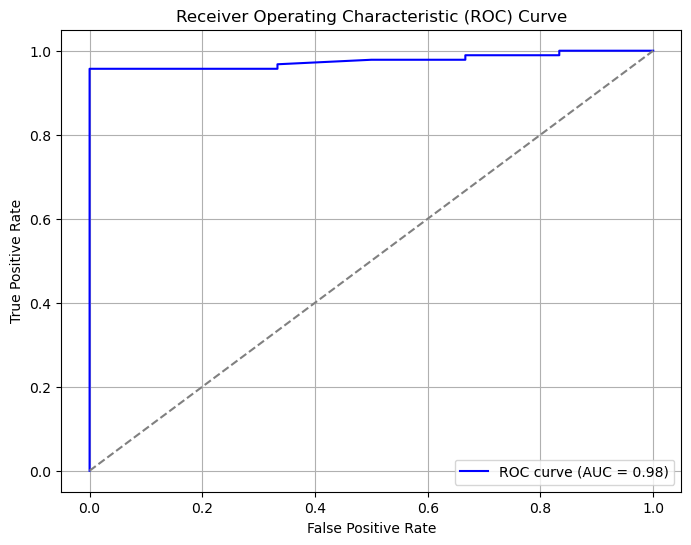

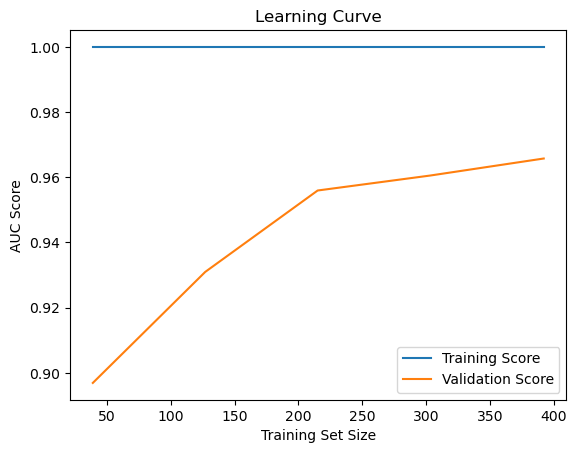

In [37]:
# BASE MODEL B - RANDOM FOREST for 'Freedom from distant metastasis'

target_column = 'Freedom from distant metastasis'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Random Forest Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Random Forest Model: {test_accuracy:.4f}")

# AUC Scores
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature Importance
importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Vital status FFDM.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Vital status FFDM.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Vital status FFDM.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Vital status FFDM.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

Training Accuracy of Random Forest Model: 1.0000
Test Accuracy of Random Forest Model: 0.9697
Train AUC: 1.0000
Test AUC: 0.9979

Random Forest Feature Importance:
                                              Feature  Importance
36                               Locoregional control    0.146474
38                    Freedom from distant metastasis    0.116842
32                                      Local control    0.104830
33   Local control_duration of Merged updated ASRM V2    0.091822
37  Locoregional control_duration of Merged update...    0.088611
39  Freedom from distant metastasis_duration of Me...    0.085358
30                                       Vital status    0.067625
35  Regional control_duration of Merged updated AS...    0.045719
31  Overall survival_duration of Merged updated AS...    0.041837
40                                    Days to last FU    0.039949
34                                   Regional control    0.021258
1                                         Ag

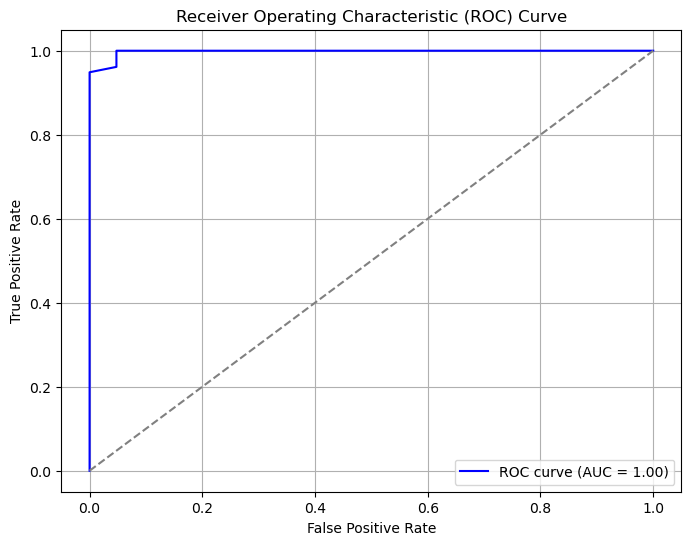

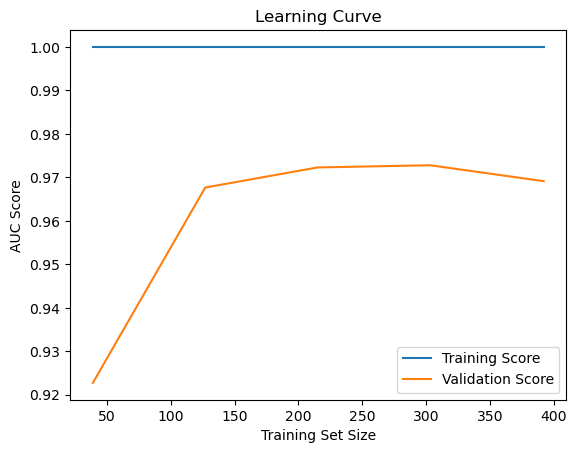

In [39]:
# BASE MODEL B - RANDOM FOREST for 'Relapse-free survival'

target_column = 'Relapse-free survival'

X = df.drop(columns=[target_column])
y = df[target_column] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Random Forest Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Random Forest Model: {test_accuracy:.4f}")

# AUC Scores
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature Importance
importances = model.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(feature_importance)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Vital status RFS.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Vital status RFS.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Vital status RFS.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Vital status RFS.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

C:\Users\Naman\AppData\Local\Temp\ipykernel_12188\4119285344.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_corr_df.index, x=top_corr_df["Correlation"], palette="viridis")


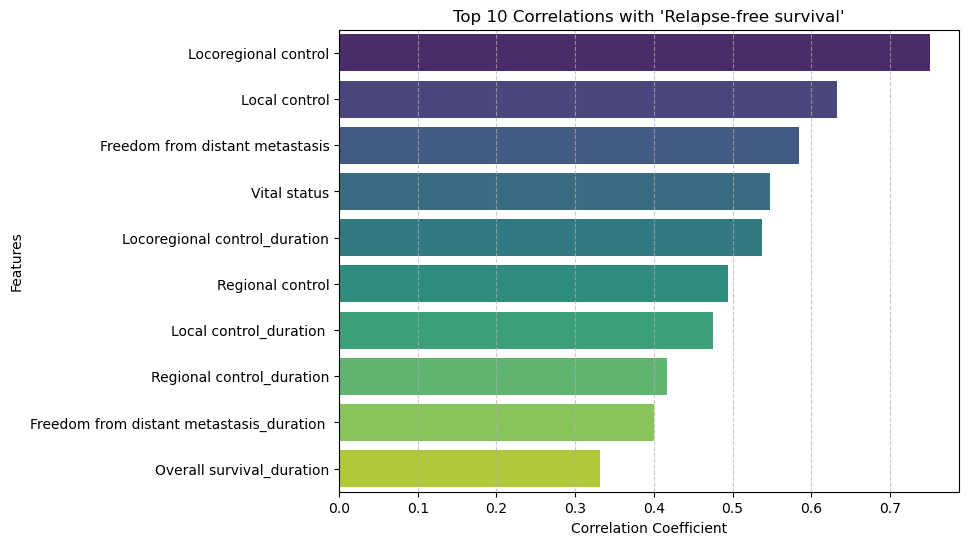

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_correlations(df, target_column, top_n=10):
    """
    Plot the correlation heatmap for all features in the dataset but only show 
    the top N features most correlated with the target column.
    
    Parameters:
        df (pd.DataFrame): The input dataframe.
        target_column (str): The column name to find correlations with.
        top_n (int): The number of top features to display in the correlation heatmap.
    """
    if target_column not in df.columns:
        raise ValueError(f"Column '{target_column}' not found in the DataFrame.")
    
    # Compute correlations with the target column
    correlations = df.corr()[target_column].sort_values(ascending=False)
    
    # Select the top N correlated features (excluding the target column itself)
    top_features = correlations.iloc[1:top_n + 1].index.tolist()  # Exclude the target column itself
    
    # Create a DataFrame to show correlations only with the target column
    top_corr_df = pd.DataFrame(correlations[top_features]).rename(columns={target_column: "Correlation"})
    
    # Plot the top correlations
    plt.figure(figsize=(8, 6))
    sns.barplot(y=top_corr_df.index, x=top_corr_df["Correlation"], palette="viridis")
    plt.title(f"Top {top_n} Correlations with '{target_column}'")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Features")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    plt.savefig("RFS imp Features.png", dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Example usage
# df = pd.read_csv("your_data.csv")  # Load your dataset
plot_top_correlations(df, target_column="Relapse-free survival", top_n=10)


C:\Users\Naman\AppData\Local\Temp\ipykernel_12188\1475724154.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_corr_df.index, x=top_corr_df["Correlation"], palette="viridis")


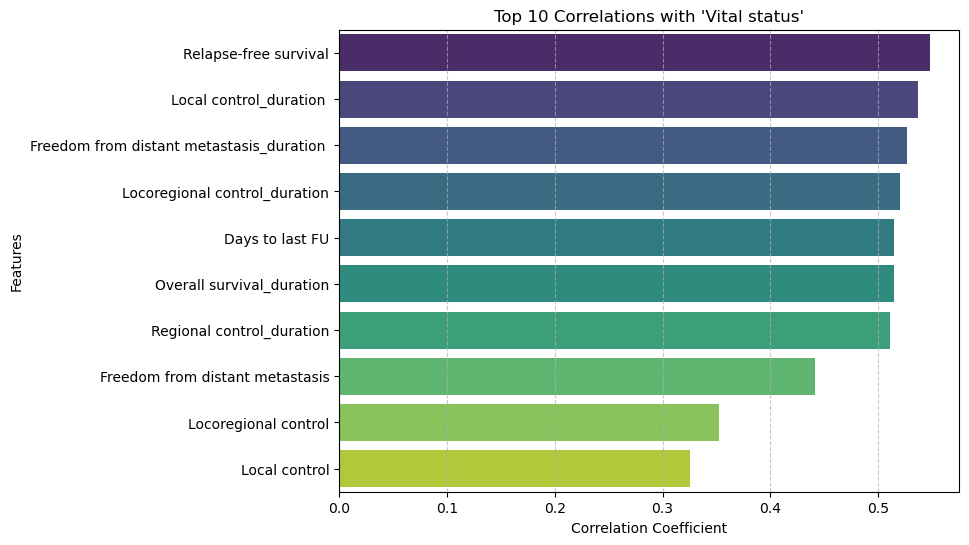

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_correlations(df, target_column, top_n=10):
    """
    Plot the correlation heatmap for all features in the dataset but only show 
    the top N features most correlated with the target column.
    
    Parameters:
        df (pd.DataFrame): The input dataframe.
        target_column (str): The column name to find correlations with.
        top_n (int): The number of top features to display in the correlation heatmap.
    """
    if target_column not in df.columns:
        raise ValueError(f"Column '{target_column}' not found in the DataFrame.")
    
    # Compute correlations with the target column
    correlations = df.corr()[target_column].sort_values(ascending=False)
    
    # Select the top N correlated features (excluding the target column itself)
    top_features = correlations.iloc[1:top_n + 1].index.tolist()  # Exclude the target column itself
    
    # Create a DataFrame to show correlations only with the target column
    top_corr_df = pd.DataFrame(correlations[top_features]).rename(columns={target_column: "Correlation"})
    
    # Plot the top correlations
    plt.figure(figsize=(8, 6))
    sns.barplot(y=top_corr_df.index, x=top_corr_df["Correlation"], palette="viridis")
    plt.title(f"Top {top_n} Correlations with '{target_column}'")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Features")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.savefig("VS imp Features,png", dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Example usage
# df = pd.read_csv("your_data.csv")  # Load your dataset
plot_top_correlations(df, target_column="Vital status", top_n=10)


C:\Users\Naman\AppData\Local\Temp\ipykernel_12188\2247275217.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Feature", x="Importance", data=df, palette="viridis")


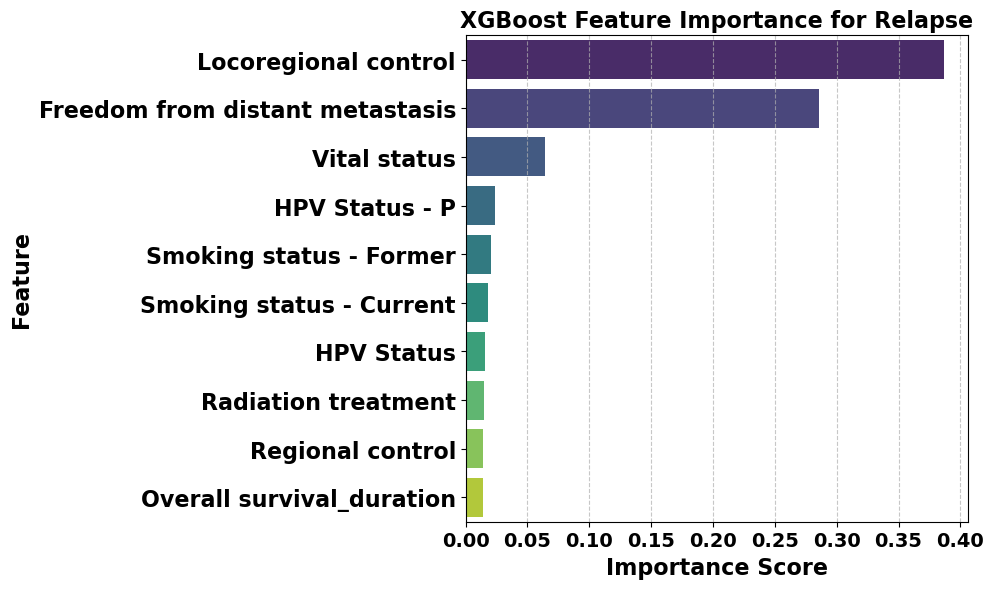

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data: XGBoost Feature Importance
data = {
    "Feature": [
        "Locoregional control",
        "Freedom from distant metastasis",
        "Vital status",
        "HPV Status - P",
        "Smoking status - Former",
        "Smoking status - Current",
        "HPV Status",
        "Radiation treatment",
        "Regional control",
        "Overall survival_duration"
    ],
    "Importance": [
        0.387115, 0.285776, 0.063792, 0.023965, 0.020846,
        0.018215, 0.015347, 0.014661, 0.014355, 0.013988
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Sort by importance for better visualization
df = df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y="Feature", x="Importance", data=df, palette="viridis")

# Customize plot
plt.title("XGBoost Feature Importance for Relapse", fontsize=16, weight='bold')
plt.xlabel("Importance Score", fontsize=16, weight='bold')
plt.ylabel("Feature", fontsize=16, weight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=16, weight='bold')  # Increase y-axis label font size
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show and save plot
plt.tight_layout()
plt.savefig("RFS_feat_imp.png", dpi=600, bbox_inches='tight', transparent=False)

plt.show()

C:\Users\Naman\AppData\Local\Temp\ipykernel_12188\3885168243.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Feature", x="Importance", data=df, palette="viridis")


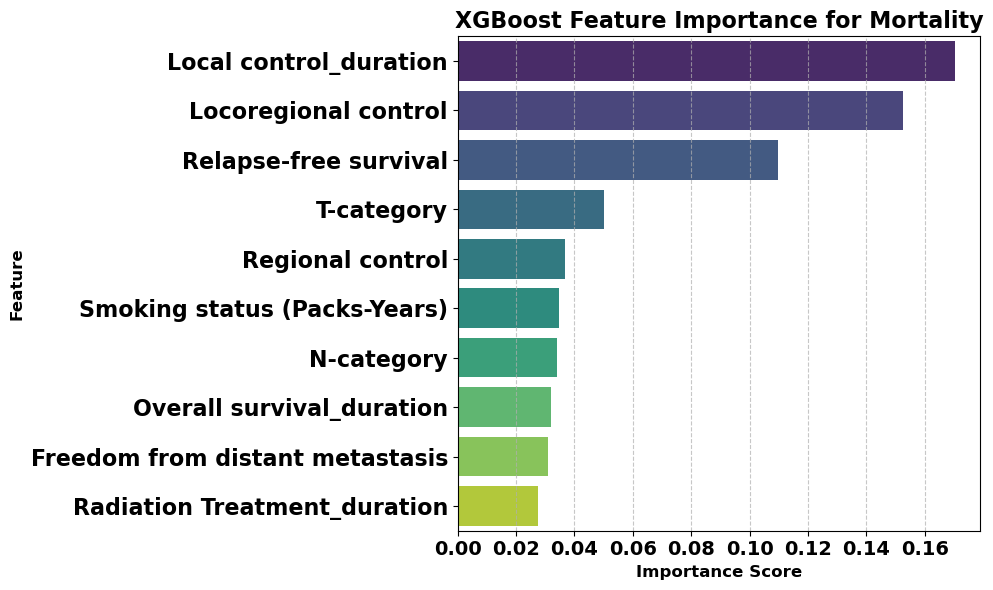

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data: XGBoost Feature Importance
data = {
    "Feature": [
        "Local control_duration",
        "Locoregional control",
        "Relapse-free survival",
        "T-category",
        "Regional control",
        "Smoking status (Packs-Years)",
        "N-category",
        "Overall survival_duration",
        "Freedom from distant metastasis",
        "Radiation Treatment_duration"
    ],
    "Importance": [
        0.170382, 0.152572, 0.109825, 0.049984, 0.036798,
        0.034544, 0.033868, 0.032121, 0.031051, 0.027469
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Sort by importance for better visualization
df = df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(y="Feature", x="Importance", data=df, palette="viridis")

# Customize plot
plt.title("XGBoost Feature Importance for Mortality", fontsize=16, weight='bold')
plt.xlabel("Importance Score", fontsize=12, weight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=16, weight='bold')  # Increase y-axis label font size
plt.ylabel("Feature", fontsize=12, weight='bold')
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Save and Show Plot
plt.tight_layout()
plt.savefig("VS feat imp.png", dpi=600, bbox_inches='tight', transparent=False)
plt.show()


C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy of Logistic Regression Model: 0.9796
Test Accuracy of Logistic Regression Model: 0.9899
Train AUC: 0.9815
Test AUC: 1.0000

Logistic Regression Feature Importance:
                                              Feature  Coefficient
30                                       Vital status     1.719855
0                                              Gender     1.087678
3                             Smoking status - Former     0.858420
10                               Tumor laterality - R     0.612790
39          Freedom from distant metastasis_duration      0.404493
21                           AJCC Stage (7th edition)     0.386320
24        TC - Induction chemotherapy+Radiation alone     0.350750
20                                         N-category     0.307890
12                      Cancer subsite of origin- BoT     0.277601
37                      Locoregional control_duration     0.272445
19                                         T-category     0.262615
38            

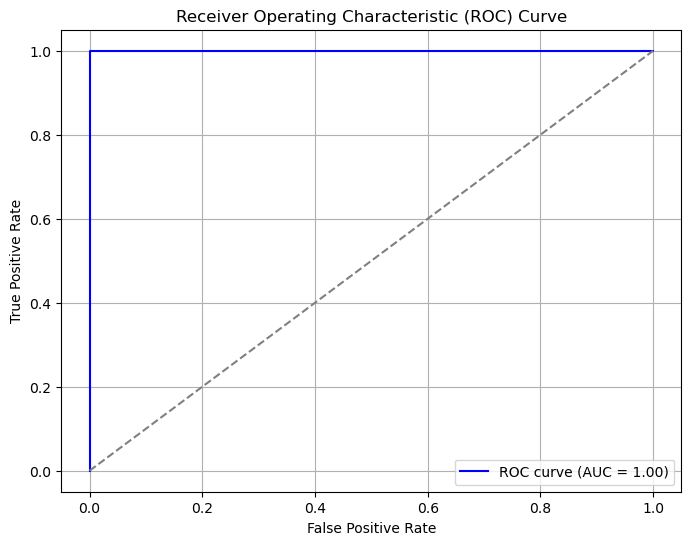

C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

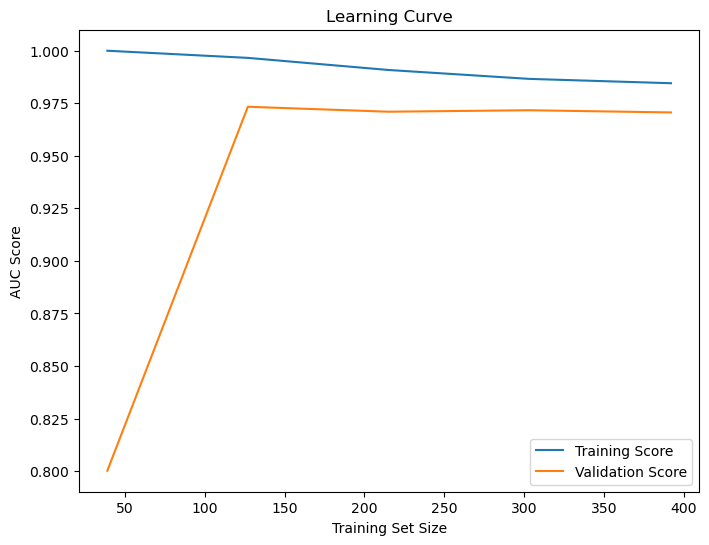

In [102]:
# BASE MODEL A - LOGISTIC REGRESSION

target_column = 'Relapse-free survival'

# Splitting data
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Logistic Regression Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Logistic Regression Model: {test_accuracy:.4f}")

# AUC Scores
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature Importance (Coefficients)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Feature Importance:")
print(feature_importance)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Logistic Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Logistic Vital status.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Logistic Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve Logistic Vital status.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy of Soft Voting Classifier: 0.9974
Test Accuracy of Soft Voting Classifier: 0.8990

Confusion Matrix:
[[12 10]
 [ 0 77]]


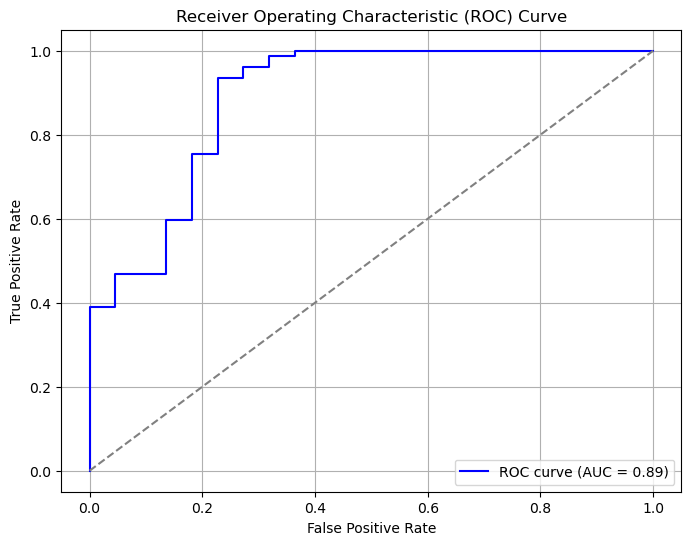

C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Naman\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

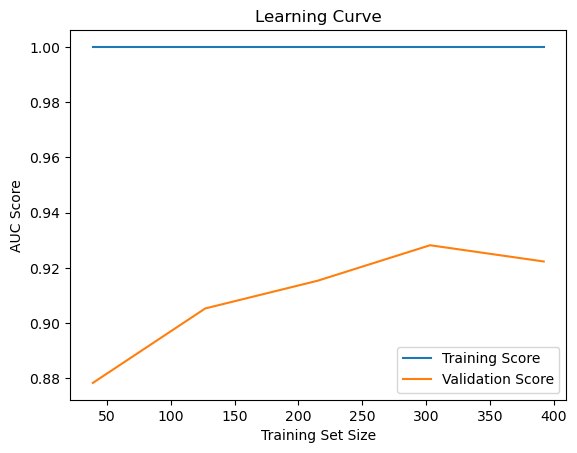

C:\Users\Naman\AppData\Local\Temp\ipykernel_12188\3299963747.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_feature_df, palette="viridis")


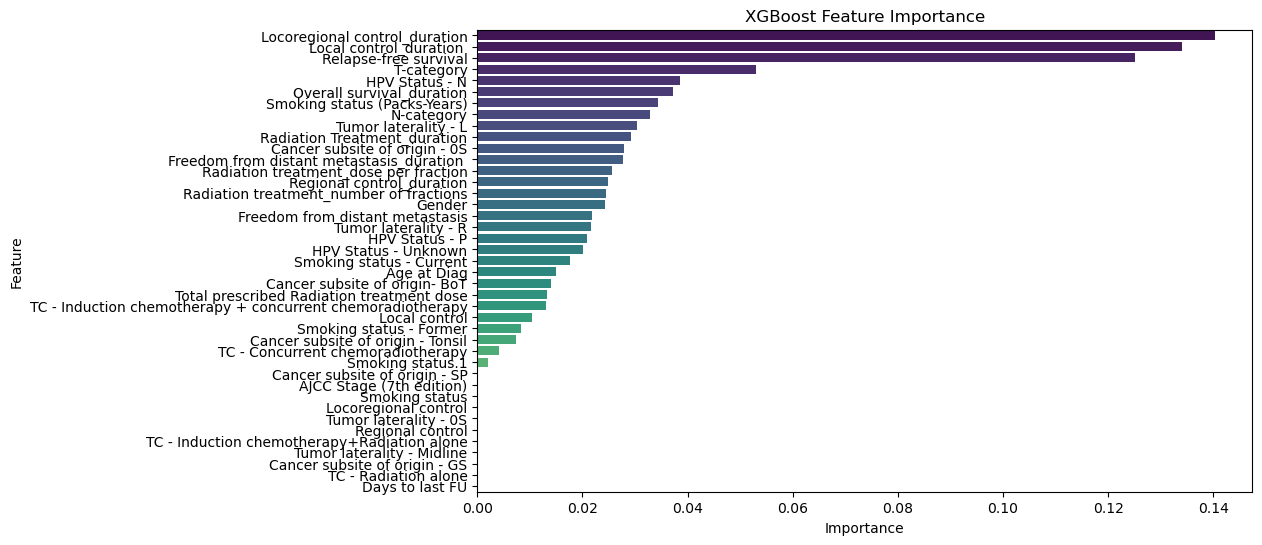

C:\Users\Naman\AppData\Local\Temp\ipykernel_12188\3299963747.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_feature_df, palette="viridis")


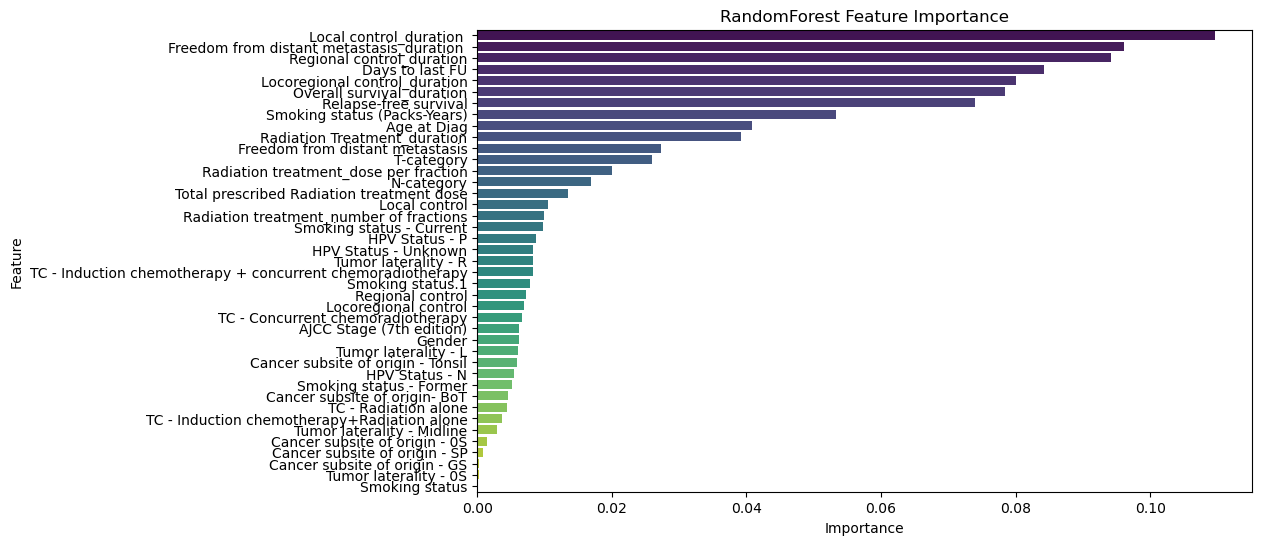

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sns

# Prepare the dataset
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
xgb_model = XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Create a soft voting classifier (predict_proba is available)
soft_voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lr', lr_model)
    ],
    voting='soft'  # Soft voting (using predicted probabilities)
)

# Train the soft voting ensemble
soft_voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_train = soft_voting_clf.predict(X_train)
y_pred_test = soft_voting_clf.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Soft Voting Classifier: {train_accuracy:.4f}")
print(f"Test Accuracy of Soft Voting Classifier: {test_accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, soft_voting_clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(soft_voting_clf, X, y, cv=5, scoring='roc_auc')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.show()

# Train individual models for feature importance
xgb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Feature importance from XGBoost
xgb_importances = xgb_model.feature_importances_
xgb_feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
}).sort_values(by='Importance', ascending=False)

# Feature importance from RandomForest
rf_importances = rf_model.feature_importances_
rf_feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot XGBoost feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_feature_df, palette="viridis")
plt.title('XGBoost Feature Importance')
plt.show()

# Plot RandomForest feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_df, palette="viridis")
plt.title('RandomForest Feature Importance')
plt.show()


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import set_config
from sklearn.utils import Bunch
from sklearn.base import BaseEstimator, TransformerMixin
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split


# Prepare the dataset (Assuming df is already defined)
target_column = 'Vital status'
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing data
    ('scaler', StandardScaler()),  # Standardize the data
    ('voting_classifier', VotingClassifier(
        estimators=[
            ('xgb', XGBClassifier(n_estimators=90, learning_rate=0.3, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('lr', LogisticRegression(max_iter=1000, random_state=42))
        ],
        voting='soft'))  # Soft voting for better performance
])

# Train the ensemble model pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the pipeline
set_config(display='diagram')
pipeline  # This will display the pipeline structure in Jupyter or compatible environments


Training Accuracy: 0.9974
Test Accuracy: 0.8990

Confusion Matrix:
[[13  9]
 [ 1 76]]


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('voting_classifier',
                 VotingClassifier(estimators=[('xgb',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=None,
                                                             feature_types=N...
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=90,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             random_state=42, ...)),
                                              ('rf',
                                               RandomForestClassifier(random_state=42)),
                                              ('lr',
                                               LogisticRegression(max_iter=1000,
                                                                  random_state=42))],
                                  voting='soft'))])

Training Accuracy of Logistic Regression Model: 1.0000
Test Accuracy of Logistic Regression Model: 0.9899
Train AUC: 1.0000
Test AUC: 1.0000

Logistic Regression Feature Importance:
                                              Feature  Coefficient
38          Freedom from distant metastasis_duration      0.701021
28            Radiation treatment_number of fractions     0.307199
19                                         T-category     0.155280
1                                         Age at Diag     0.153912
39                              Relapse-free survival     0.128662
35                          Regional control_duration     0.120976
22                  TC - Concurrent chemoradiotherapy     0.113536
12                      Cancer subsite of origin- BoT     0.097414
0                                              Gender     0.076232
17                                     HPV Status - N     0.070850
5                                    Smoking status.1     0.036480
23  TC - Induc

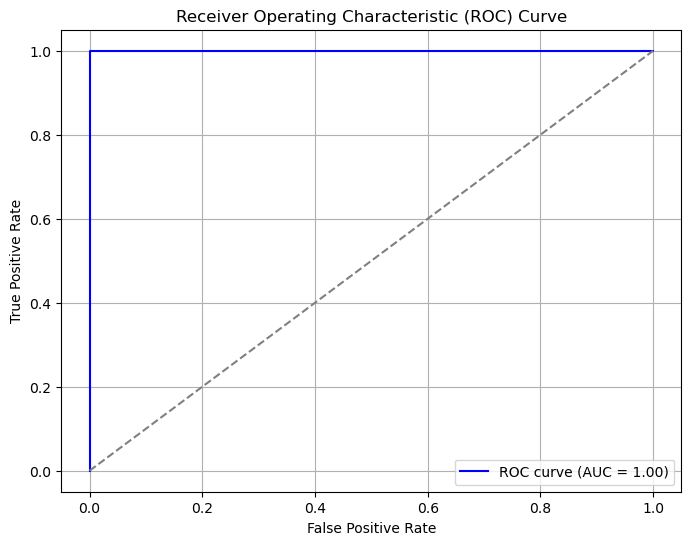

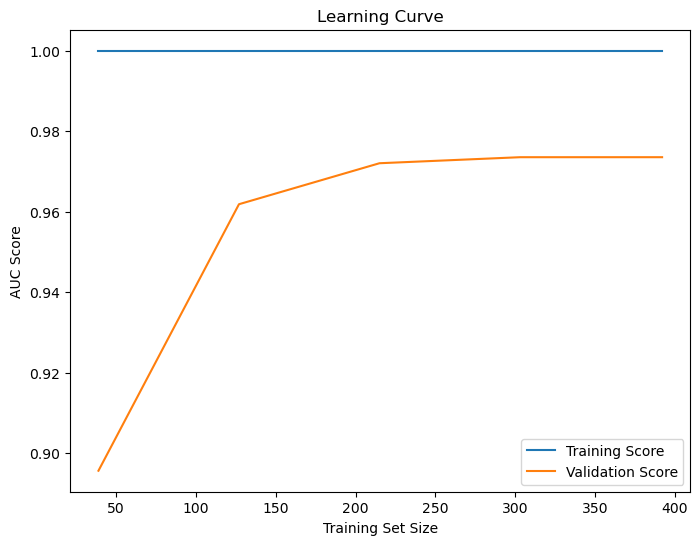

In [18]:
# BASE MODEL A - LOGISTIC REGRESSION

target_column = 'Freedom from distant metastasis'

# Splitting data
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy of Logistic Regression Model: {train_accuracy:.4f}")
print(f"Test Accuracy of Logistic Regression Model: {test_accuracy:.4f}")

# AUC Scores
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Train AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Feature Importance (Coefficients)
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression Feature Importance:")
print(feature_importance)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC Logistic Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("ROC Logistic Vital status.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc')

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('AUC Score')
plt.title('Learning Curve')
plt.savefig("Learning Curve Logistic Vital status.png", dpi=600, bbox_inches='tight', transparent=False)
plt.savefig("Learning Curve ffdm lr.pdf", dpi=600, bbox_inches='tight', transparent=False)
plt.show()